# Analyzing the Impact of Natural Disasters on Remittance Flows

## Abstract
This study investigates the impact of natural disasters on remittance flows in countries vulnerable to such events. By analyzing data on remittances as a percentage of GDP and actual remittance amounts, we aim to understand how natural disasters affect remittance inflows before, during, and after these events. The study uses various datasets, applies statistical methods to highlight the impacts, and constructs predictive models to offer insights into strengthening economic resilience in disaster-prone regions.


## Introduction

## Overview of Remittances and Their Importance
Remittances are significant financial or in-kind transfers made by migrants to friends and relatives in their communities of origin. These transfers go beyond the mere exchange of money, as they encompass a wide range of valuable contributions that migrants bring back from their experiences abroad. The International Monetary Fund (IMF) defines remittances as the sum of two main components in their Balance of Payments Statistics manual.

Firstly, "compensation of employees" includes the income earned by temporary migrant workers in the host country, along with the income of workers employed by embassies, international organizations, and foreign companies. This component considers the entirety of temporary migrant workers' income, even if it may not all be sent back to the origin country due to living expenses. Additionally, salaries of staff employed by foreign entities also count towards remittances, even if the individuals themselves are not migrants.

Secondly, "personal transfers" encompass all current transfers in cash or kind between residents and non-residents. These transfers can involve both migrants and non-migrants and include exchanges that occur within a single country or across borders.

Furthermore, remittances are not limited to financial transactions but can also take the form of internal transfers within countries or social remittances. Social remittances refer to the flow of ideas, behaviors, identities, and social capital from receiving-country communities to sending-country communities. This includes innovative ideas, transnational networks, knowledge, political values, policy reforms, and technological skills shared by migrants upon their return.

Overall, remittances serve as a vital link between migration and development, with a profound impact on the global economy. They play a crucial role in supporting economic stability, reducing poverty, and enhancing living standards, particularly in developing countries where they often surpass official development assistance.


## Description of How Natural Disasters Can Influence Remittance Flows
Natural disasters can have a profound impact on remittance flows. These events often disrupt local economies, leading to increased financial support from family memberHowever, these events can also hinder remittance transfers due to economic challenges faced by migrant workers post-disaster. This dual impact underscores the need for a comprehensive understanding of how natural disasters shape remittance behaviors to inform effective support strategies during times of crisis and recovery. workers.

## Objectives of the Study
The primary aim of this study is to analyze the impact of natural disasters on remittance flows. Specific objectives include:
1. Investigating changes in remittance flows before, during, and after natural disasters.
2. Identifying patterns and trends in remittance flows in disaster-prone regions.
3. Quantifying the relationship between natural disasters and remittance inflows using statistical and predictive models.


## Data Sources

1. Personal Remittances received (in USD)
2. Personal Remittances received (% of GDP)
3. GDP dataset (World Bank Data)
4. International Disasters Data (Public EM-DAT)
5. Global Population Dataset (World Bank Data)
6. Inflation Interest Unemployment (Kaggle)

## Importing Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
import pycountry
import joblib
import matplotlib.ticker as ticker


## Loading Datasets into pandas DataFrames

In [2]:
remittance_pct = pd.read_csv("API_BX.TRF.PWKR.DT.GD.ZS_DS2_en_csv_v2_245443.csv", skiprows = 4)
remittance_Amount = pd.read_csv("API_BX.TRF.PWKR.CD.DT_DS2_en_csv_v2_561611.csv", skiprows = 4)
df = pd.read_excel("public_emdat_custom_request_2024-05-02_ded84ba8-4331-4fb3-b9e2-3b46c013af70 (2).xlsx")
remittance_gdp = pd.read_csv("GDP.csv")
pop = pd.read_csv("Population.data.csv", skiprows = 4)

## Data Preprocessing

In [3]:
# Create a dictionary mapping country codes to country names
country_code_to_name = {country.alpha_3: country.name for country in pycountry.countries}

# Update country names and country codes in meta_data_API DataFrame
remittance_pct['Country Name'] = remittance_pct['Country Code'].map(country_code_to_name)
remittance_pct['Country Code'] = remittance_pct['Country Code'].apply(lambda x: x.upper())

# Update country names and country codes in remittance_amount DataFrame
remittance_Amount['Country Name'] = remittance_Amount['Country Code'].map(country_code_to_name)
remittance_Amount['Country Code'] = remittance_Amount['Country Code'].apply(lambda x: x.upper())

# Update country names and country codes in em_data DataFrame
df['Country'] = df['ISO'].map(country_code_to_name)
df['ISO'] = df['ISO'].apply(lambda x: x.upper())

# Update country names and country codes in gdp_data DataFrame
remittance_gdp['Country Name'] = remittance_gdp['Country Code'].map(country_code_to_name)
remittance_gdp['Country Code'] = remittance_gdp['Country Code'].apply(lambda x: x.upper())

# Update country names and country codes in Population DataFrame
pop['Country Name'] = pop['Country Code'].map(country_code_to_name)
pop['Country Code'] = pop['Country Code'].apply(lambda x: x.upper())

# Drop rows with year 2023 and 2024 in 'Year' column in the DataFrame em_data
df = df[~df['Start Year'].isin([2023, 2024])]

In [4]:
remittance_pct.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905,NaN,NaN
1,NaN,AFE,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180510,1.029486,0.982369,1.347993,1.436747,1.488722,1.560329,1.541921,NaN,NaN


In [5]:
remittance_Amount.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.364010e+07,5.268434e+07,5.614049e+07,3.692030e+07,3.426402e+07,3.498404e+07,3.584564e+07,3.827949e+07,NaN,NaN
1,NaN,AFE,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.096848e+10,1.018049e+10,1.067490e+10,1.483547e+10,1.443240e+10,1.380367e+10,1.696703e+10,1.841613e+10,NaN,NaN


In [6]:
df.head(2)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25


In [7]:
remittance_gdp.head(2)

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
1,NaN,AFE,4.193891e+10,4.592017e+10,4.944074e+10,6.493383e+10,7.988815e+10,8.495509e+10,8.505030e+10,9.456692e+10,...,9.863429e+11,1.006992e+12,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12


In [8]:
pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,NaN
1,NaN,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN


In [9]:
# drop rows where country name is null
remittance_pct = remittance_pct.dropna(subset = "Country Name")

remittance_Amount = remittance_Amount.dropna(subset = "Country Name")

df = df.dropna(subset = "Country")

remittance_gdp = remittance_gdp.dropna(subset = "Country Name")

pop = pop.dropna(subset = "Country Name")

In [10]:
remittance_pct.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [11]:
cols = ['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

remittance_pct = remittance_pct.melt(id_vars = ["Country Name", "Country Code"], value_vars = cols, var_name = "Year", value_name = "%Remittance")

remittance_amount = remittance_Amount.melt(id_vars = ["Country Name", "Country Code"], value_vars = cols, var_name = "Year", value_name = "Remittance$")

remittance_gdp = remittance_gdp.melt(id_vars = ["Country Name", "Country Code"], value_vars = cols, var_name = "Year", value_name = "GDP$")

pop = pop.melt(id_vars = ["Country Name", "Country Code"], value_vars = cols, var_name = "Year", value_name = "Population")

In [12]:
remittance_pct.head()

,Country Name,Country Code,Year,%Remittance
0,Aruba,ABW,2000,0.057850
1,Afghanistan,AFG,2000,NaN
2,Angola,AGO,2000,NaN
3,Albania,ALB,2000,17.176407
4,Andorra,AND,2000,NaN


In [13]:
remittance_amount.head()

,Country Name,Country Code,Year,Remittance$
0,Aruba,ABW,2000,1.083799e+06
1,Afghanistan,AFG,2000,NaN
2,Angola,AGO,2000,NaN
3,Albania,ALB,2000,5.978000e+08
4,Andorra,AND,2000,NaN


In [14]:
remittance_gdp.head()

,Country Name,Country Code,Year,GDP$
0,Aruba,ABW,2000,1.873453e+09
1,Afghanistan,AFG,2000,NaN
2,Angola,AGO,2000,9.129595e+09
3,Albania,ALB,2000,3.480355e+09
4,Andorra,AND,2000,1.429048e+09


In [15]:
pop.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,2000,89101.0
1,Afghanistan,AFG,2000,19542982.0
2,Angola,AGO,2000,16394062.0
3,Albania,ALB,2000,3089027.0
4,Andorra,AND,2000,66097.0


In [16]:
remittance_pct.isnull().sum()/len(remittance_amount)*100

Country Name     0.00000
Country Code     0.00000
Year             0.00000
%Remittance     14.29727
dtype: float64

In [17]:
remittance_amount.isnull().sum()/len(remittance_amount)*100

Country Name     0.00000
Country Code     0.00000
Year             0.00000
Remittance$     13.22548
dtype: float64

In [18]:
remittance_gdp.isnull().sum()/len(remittance_gdp)*100

Country Name    0.000000
Country Code    0.000000
Year            0.000000
GDP$            4.165824
dtype: float64

In [19]:
pop.isnull().sum()/len(pop)*100

Country Name    0.0
Country Code    0.0
Year            0.0
Population      0.0
dtype: float64

In [ ]:
# Fill NaN values with the median of each country for the %Remittance column
remittance_pct['%Remittance'] = remittance_pct.groupby('Country Name')['%Remittance'].transform(lambda x: x.fillna(x.median()))

# Fill NaN values with the median of each country for the Remittance$ column in remittance_amount dataset
remittance_amount['Remittance$'] = remittance_amount.groupby('Country Name')['Remittance$'].transform(lambda x: x.fillna(x.median()))

# Fill NaN values with the median of each country for the Remittance$ column in remittance_gdp dataset
remittance_gdp['GDP$'] = remittance_gdp.groupby('Country Name')['GDP$'].transform(lambda x: x.fillna(x.median()))


In [21]:
# Check for remaining missing values in remittance_pct
missing_pct = remittance_pct['%Remittance'].isna().sum()

# Check for remaining missing values in remittance_amount
missing_amount = remittance_amount['Remittance$'].isna().sum()

# Check for remaining missing values in remittance_gdp
missing_gdp = remittance_gdp['GDP$'].isna().sum()

print(f"Remaining missing values in remittance_pct: {missing_pct}")
print(f"Remaining missing values in remittance_amount: {missing_amount}")
print(f"Remaining missing values in remittance_gdp: {missing_gdp}")

Remaining missing values in remittance_pct: 391
Remaining missing values in remittance_amount: 391
Remaining missing values in remittance_gdp: 69


In [ ]:
# Fill remaining NaN values with the global median for %Remittance
global_median_pct = remittance_pct['%Remittance'].median()
remittance_pct['%Remittance'].fillna(global_median_pct, inplace=True)

# Fill remaining NaN values with the global median for Remittance$ in remittance_amount dataset
global_median_amount = remittance_amount['Remittance$'].median()
remittance_amount['Remittance$'].fillna(global_median_amount, inplace=True)

# Fill remaining NaN values with the global median for Remittance$ in remittance_gdp dataset
global_median_gdp = remittance_gdp['GDP$'].median()
remittance_gdp['GDP$'].fillna(global_median_gdp, inplace=True)

In [23]:
# Check for remaining missing values in remittance_pct
missing_pct = remittance_pct['%Remittance'].isna().sum()

# Check for remaining missing values in remittance_amount
missing_amount = remittance_amount['Remittance$'].isna().sum()

# Check for remaining missing values in remittance_gdp
missing_gdp = remittance_gdp['GDP$'].isna().sum()

print(f"Remaining missing values in remittance_pct: {missing_pct}")
print(f"Remaining missing values in remittance_amount: {missing_amount}")
print(f"Remaining missing values in remittance_gdp: {missing_gdp}")

Remaining missing values in remittance_pct: 0
Remaining missing values in remittance_amount: 0
Remaining missing values in remittance_gdp: 0


In [24]:
# Ensure both 'Year' columns have the same data type (e.g., integer) before merging
remittance_pct['Year'] = remittance_pct['Year'].astype(int)
remittance_amount['Year'] = remittance_amount['Year'].astype(int)
remittance_gdp['Year'] = remittance_gdp['Year'].astype(int)
pop['Year'] = pop['Year'].astype(int)

# merge trans_rem_data and trans_gdp_data DataFrames are already loaded
merged_remgdp_df = pd.merge(pop, remittance_pct, on=['Country Name', 'Country Code', 'Year'], how='inner')

merged_remgdp_df = pd.merge(merged_remgdp_df, remittance_amount, on=['Country Name', 'Country Code', 'Year'], how='inner')

merged_remgdp_df = pd.merge(merged_remgdp_df, remittance_gdp, on=['Country Name', 'Country Code', 'Year'], how='inner')

# Display the first few rows of the merged DataFrame
merged_remgdp_df.head(3)

,Country Name,Country Code,Year,Population,%Remittance,Remittance$,GDP$
0,Aruba,ABW,2000,89101.0,0.057850,1.083799e+06,1.873453e+09
1,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10
2,Angola,AGO,2000,16394062.0,0.009920,6.020550e+06,9.129595e+09


In [25]:
# Checking the distribution of missing values
missing_values = merged_remgdp_df.isnull().mean() * 100
print(missing_values)

Country Name    0.0
Country Code    0.0
Year            0.0
Population      0.0
%Remittance     0.0
Remittance$     0.0
GDP$            0.0
dtype: float64


## Disaster Dataset

In [26]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [27]:
df.isnull().sum()/len(df)*100

DisNo.                                        0.000000
Historic                                      0.000000
Classification Key                            0.000000
Disaster Group                                0.000000
Disaster Subgroup                             0.000000
Disaster Type                                 0.000000
Disaster Subtype                              0.000000
External IDs                                 90.514727
Event Name                                   68.335867
ISO                                           0.000000
Country                                       0.000000
Subregion                                     0.000000
Region                                        0.000000
Location                                      8.421312
Origin                                       82.869819
Associated Types                             85.552315
OFDA/BHA Response                             0.000000
Appeal                                        0.000000
Declaratio

In [28]:
df = df[df["Disaster Group"] == "Natural"]
df.head(2)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25


In [29]:
from datetime import datetime
import calendar

# Create a copy of the original DataFrame
original_df = df.copy()

# Select the columns related to dates
date_cols = ['Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day']
disaster = df[date_cols]

# Helper function to handle NaN values and convert to datetime
def create_date(row, year_col, month_col, day_col):
    try:
        return datetime(int(row[year_col]), int(row[month_col]), int(row[day_col]))
    except:
        return None

# Function to generate synthetic data for missing months and days
def generate_synthetic_data(row, year_col, month_col, day_col):
    if pd.isnull(row[month_col]):
        row[month_col] = np.random.randint(1, 13)
    if pd.isnull(row[day_col]):
        days_in_month = calendar.monthrange(int(row[year_col]), int(row[month_col]))[1]
        row[day_col] = np.random.randint(1, days_in_month + 1)
    return row

# Apply the function to generate synthetic data
disaster = disaster.apply(lambda row: generate_synthetic_data(row, 'Start Year', 'Start Month', 'Start Day'), axis=1)
disaster = disaster.apply(lambda row: generate_synthetic_data(row, 'End Year', 'End Month', 'End Day'), axis=1)

# Create Start and End date columns
disaster['Start Date'] = disaster.apply(lambda row: create_date(row, 'Start Year', 'Start Month', 'Start Day'), axis=1)
disaster['End Date'] = disaster.apply(lambda row: create_date(row, 'End Year', 'End Month', 'End Day'), axis=1)

# Calculate Duration
disaster['Duration Days'] = (disaster['End Date'] - disaster['Start Date']).dt.days

# Set duration of 0 days to 1
disaster['Duration Days'] = disaster['Duration Days'].apply(lambda x: 1 if x == 0 else x)

# Function to convert days to years, months, and days
def convert_days_to_ymd(days):
    if pd.isnull(days):
        return None, None, None
    years = days // 365
    months = (days % 365) // 30
    days = (days % 365) % 30
    return years, months, days

disaster[['Duration Years', 'Duration Months', 'Duration Days']] = disaster['Duration Days'].apply(lambda x: pd.Series(convert_days_to_ymd(x)))

# Drop the date-related columns from 'disaster'
disaster = disaster.drop(columns=date_cols)

# Add new data as columns to the original DataFrame
df = pd.concat([original_df, disaster], axis=1)

df.head(3)


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update,Start Date,End Date,Duration Days,Duration Years,Duration Months
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,9.706216,NaN,2003-07-01,2023-09-25,1960-07-04,1960-09-24,22,0,2
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,206054.0,9.706216,NaN,2007-11-08,2023-09-25,1960-04-24,1960-04-24,1,0,0
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,9.706216,NaN,2004-04-13,2023-09-25,1960-01-13,1960-01-13,1,0,0


In [30]:
df.drop(columns = ['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Subregion', 'Region', 
    'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Location', 'Origin', 
    'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', 
    'AID Contribution (\'000 US$)', 'Magnitude Scale', 'Latitude', 'Longitude',  'River Basin', 'Reconstruction Costs (\'000 US$)', 
    'Reconstruction Costs, Adjusted (\'000 US$)', 'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)', 
    'Total Damage, Adjusted (\'000 US$)', 'End Year',  'Admin Units', 'Entry Date', 'Last Update', 'Start Month', 'End Year',
    'End Month', 'Start Date', 'End Date', 'Start Day', 'End Day', 'Duration Years', 'Duration Months', 'ISO'], inplace = True)

df.head(2)

,Disaster Type,Country,Magnitude,Start Year,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI,Duration Days
0,Flood,Bangladesh,NaN,1960,10000.0,NaN,NaN,NaN,NaN,NaN,9.706216,22
1,Earthquake,"Iran, Islamic Republic of",6.0,1960,480.0,NaN,NaN,NaN,NaN,20000.0,9.706216,1


In [31]:
df.rename(columns = { "Country":"Country Name", "Start Year":"Year", "Duration Days":"Duration"}, inplace = True)

In [32]:
df["Year"] = df["Year"].astype(int)
df = df[(df["Year"] >= 2000) & (df["Year"] < 2023)]
df.head(3)

,Disaster Type,Country Name,Magnitude,Year,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI,Duration
9540,Drought,Djibouti,NaN,2001,NaN,NaN,100000.0,NaN,100000.0,NaN,58.111474,28
9545,Drought,Sudan,NaN,2000,NaN,NaN,2000000.0,NaN,2000000.0,NaN,56.514291,5
9546,Drought,Somalia,NaN,2000,21.0,NaN,1200000.0,NaN,1200000.0,NaN,56.514291,11


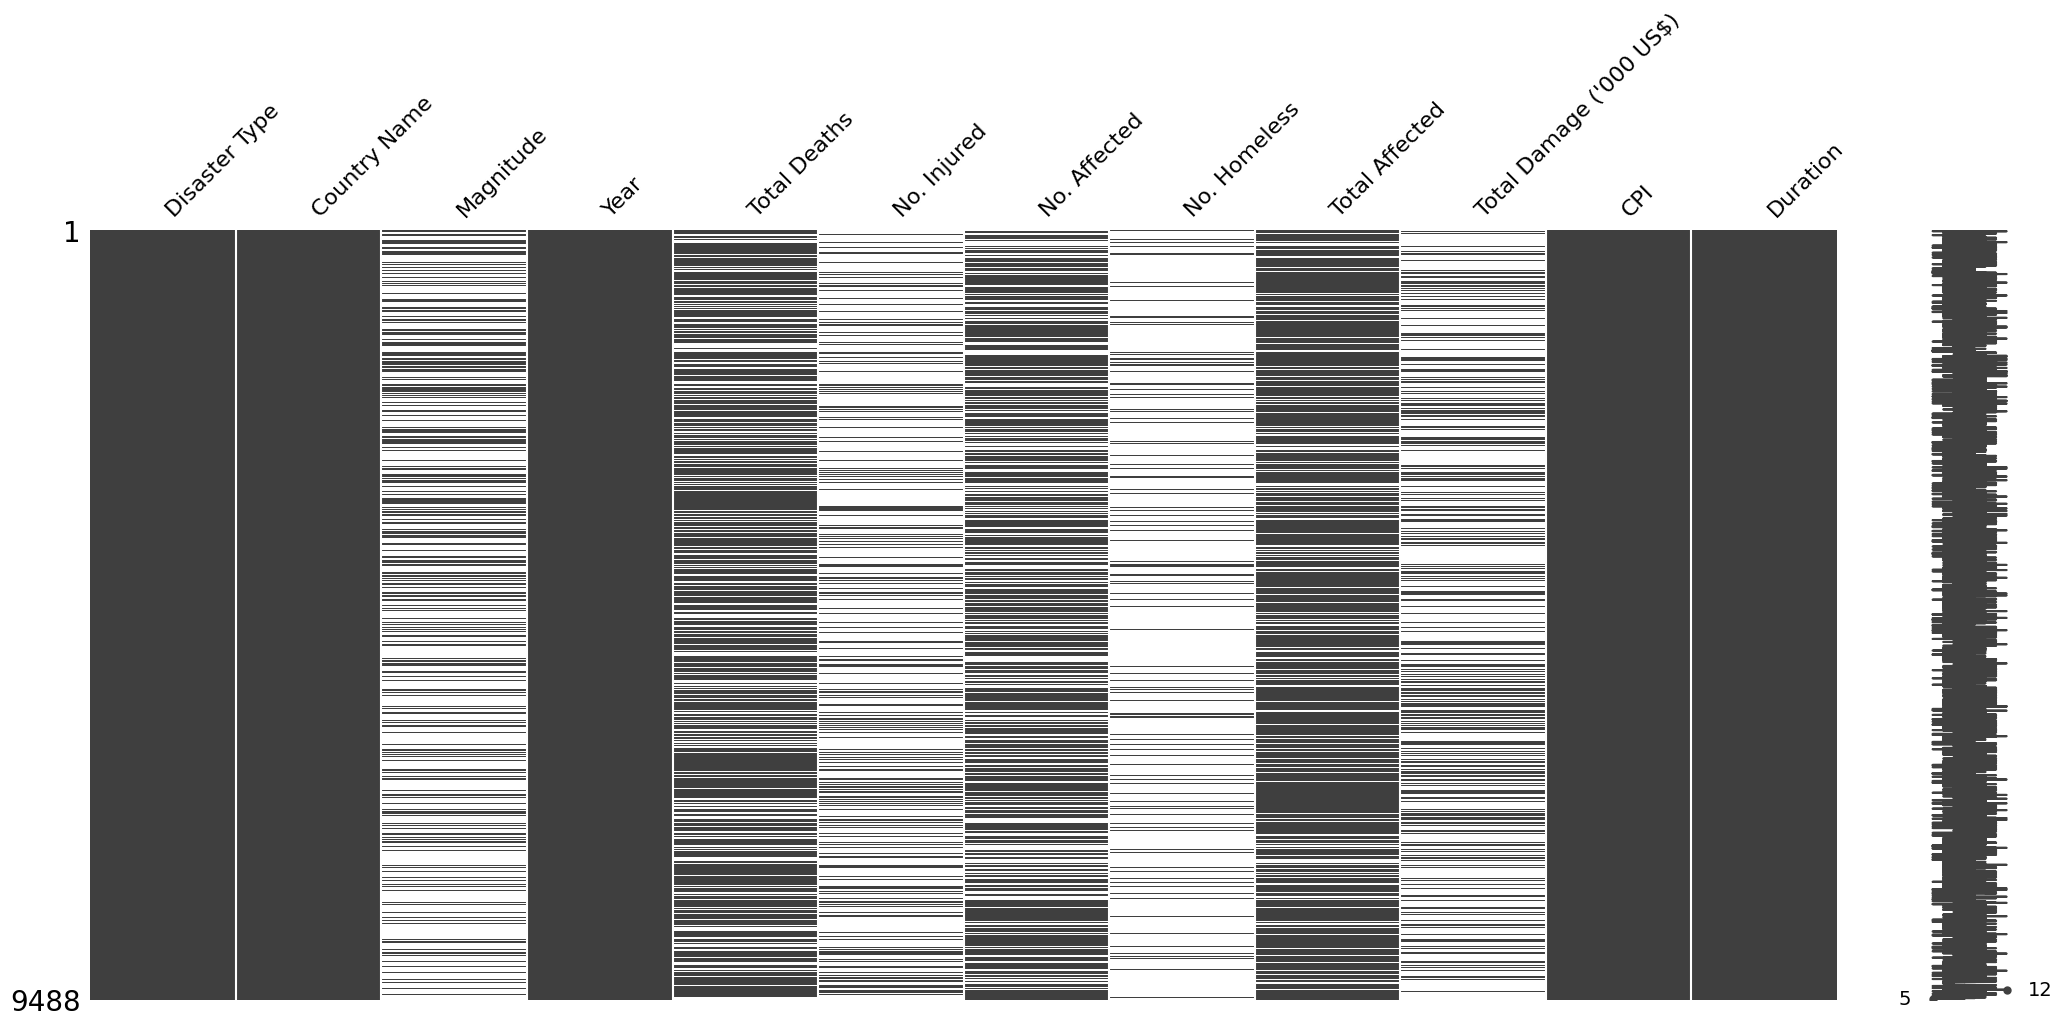

In [33]:
import missingno as msno

# Visualize the missing data
msno.matrix(df)
plt.show()

In [34]:
zero_count = len(df[df['Duration'] == 0])
total_count = len(df)
percentage_zeros = (zero_count / total_count) * 100
print(f"The percentage of 0's in the 'duration' column is: {percentage_zeros:.2f}%")

The percentage of 0's in the 'duration' column is: 1.16%


In [35]:
df['Duration'].replace(0, 1, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_20152\4070769276.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].replace(0, 1, inplace=True)


In [36]:
# Function to generate synthetic data using regression
def generate_synthetic_data(df, column, features):
    not_null = df[df[column].notnull()]
    null = df[df[column].isnull()]
    
    X_train = not_null[features]
    y_train = not_null[column]
    
    # Impute missing values in X_train
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    X_predict = null[features]
    X_predict_imputed = imputer.transform(X_predict)
    df.loc[df[column].isnull(), column] = model.predict(X_predict_imputed)

# Columns with high missing values
columns_to_impute = ['Total Deaths', 'Total Affected', 'Magnitude', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Damage (\'000 US$)']

features = ['Total Deaths', 'Total Affected', 'Magnitude', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Damage (\'000 US$)']

for column in columns_to_impute:
    generate_synthetic_data(df, column, features)

# Check for remaining missing values
print(df.isnull().sum())

Disaster Type              0
Country Name               0
Magnitude                  0
Year                       0
Total Deaths               0
No. Injured                0
No. Affected               0
No. Homeless               0
Total Affected             0
Total Damage ('000 US$)    0
CPI                        0
Duration                   0
dtype: int64


In [37]:
print(df.dtypes)

Disaster Type               object
Country Name                object
Magnitude                  float64
Year                         int32
Total Deaths               float64
No. Injured                float64
No. Affected               float64
No. Homeless               float64
Total Affected             float64
Total Damage ('000 US$)    float64
CPI                        float64
Duration                     int64
dtype: object


In [38]:
print(merged_remgdp_df.dtypes)

Country Name     object
Country Code     object
Year              int32
Population      float64
%Remittance     float64
Remittance$     float64
GDP$            float64
dtype: object


## Merge Complete Datasets

In [39]:
# Convert 'Year' column to a common data type (e.g., string) in both DataFrames
df['Year'] = df['Year'].astype(str)
merged_remgdp_df['Year'] = merged_remgdp_df['Year'].astype(str)

# Merge the two DataFrames on 'Country Name', 'Country Code', and 'Year'
merged_data = pd.merge(merged_remgdp_df, df, on=['Country Name', 'Year'], how='outer')

# Optionally, drop rows where 'Country Name' or 'Country Code' values do not match if needed
merged_data.dropna(subset=['Country Name'], inplace=True)

# Display the merged DataFrame after dropping rows with non-matching Country Names
print("Merged DataFrame after dropping non-matching Country Names:")
merged_data.head(2)

Merged DataFrame after dropping non-matching Country Names:


,Country Name,Country Code,Year,Population,%Remittance,Remittance$,GDP$,Disaster Type,Magnitude,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI,Duration
0,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,507.0,2663.707573,715667.09138,34551.73028,585994.595747,1.086232e+06,56.514291,26.0
1,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,16.0,2663.707573,11.00000,34551.73028,11.000000,1.086232e+06,56.514291,11.0


In [40]:
merged_data.isnull().sum()/len(merged_data)*100

Country Name                0.000000
Country Code                0.816291
Year                        0.000000
Population                  0.816291
%Remittance                 0.816291
Remittance$                 0.816291
GDP$                        0.816291
Disaster Type              18.473965
Magnitude                  18.473965
Total Deaths               18.473965
No. Injured                18.473965
No. Affected               18.473965
No. Homeless               18.473965
Total Affected             18.473965
Total Damage ('000 US$)    18.473965
CPI                        18.473965
Duration                   18.473965
dtype: float64

In [41]:
# Display rows with missing values before filling
missing_rows_before = merged_data[merged_data.isnull().any(axis=1)]
missing_rows_before.head(2)

,Country Name,Country Code,Year,Population,%Remittance,Remittance$,GDP$,Disaster Type,Magnitude,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI,Duration
157,Albania,ALB,2000,3089027.0,17.176407,597800000.0,3.480355e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Albania,ALB,2001,3060173.0,17.829730,699300000.0,3.922101e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
merged_data.dropna(subset=[ 'Population', '%Remittance', 'Remittance$', 'GDP$'], inplace=True)

In [43]:
merged_data['Disaster Type'].fillna('No Disaster', inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_20152\760989292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Disaster Type'].fillna('No Disaster', inplace=True)


In [44]:
# Drop non-country entries
non_countries = ['American Samoa', 'Aruba', 'Bermuda', 'Cayman Islands', 'Curaçao', 'Faroe Islands', 'French Polynesia',
                 'Gibraltar', 'Greenland', 'Guam', 'Hong Kong', 'Isle of Man', 'Macao', 'Marshall Islands', 
                 'Micronesia, Federated States of', 'New Caledonia', 'Northern Mariana Islands', 'Palau', 
                 'Puerto Rico', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Virgin Islands, British', 
                 'Virgin Islands, U.S.']

merged_data = merged_data[~merged_data['Country Name'].isin(non_countries)]

# Create empty columns for Region and Subregion
merged_data['Region'] = np.nan
merged_data['Subregion'] = np.nan

# Dictionary of regions and subregions
region_subregion = {
    'Albania': ['Europe', 'Southern Europe'],
    'Algeria': ['Africa', 'Northern Africa'],
    'American Samoa': ['Oceania', 'Polynesia'],
    'Andorra': ['Europe', 'Southern Europe'],
    'Angola': ['Africa', 'Middle Africa'],
    'Antigua and Barbuda': ['Americas', 'Caribbean'],
    'Armenia': ['Asia', 'Western Asia'],
    'Aruba': ['Americas', 'Caribbean'],
    'Austria': ['Europe', 'Western Europe'],
    'Azerbaijan': ['Asia', 'Western Asia'],
    'Bahamas': ['Americas', 'Caribbean'],
    'Bahrain': ['Asia', 'Western Asia'],
    'Barbados': ['Americas', 'Caribbean'],
    'Belarus': ['Europe', 'Eastern Europe'],
    'Belgium': ['Europe', 'Western Europe'],
    'Belize': ['Americas', 'Central America'],
    'Benin': ['Africa', 'Western Africa'],
    'Bermuda': ['Americas', 'Northern America'],
    'Bhutan': ['Asia', 'Southern Asia'],
    'Bolivia, Plurinational State of': ['Americas', 'South America'],
    'Bosnia and Herzegovina': ['Europe', 'Southern Europe'],
    'Botswana': ['Africa', 'Southern Africa'],
    'Brunei Darussalam': ['Asia', 'South-Eastern Asia'],
    'Bulgaria': ['Europe', 'Eastern Europe'],
    'Burkina Faso': ['Africa', 'Western Africa'],
    'Burundi': ['Africa', 'Eastern Africa'],
    'Cabo Verde': ['Africa', 'Western Africa'],
    'Cambodia': ['Asia', 'South-Eastern Asia'],
    'Cameroon': ['Africa', 'Middle Africa'],
    'Cayman Islands': ['Americas', 'Caribbean'],
    'Central African Republic': ['Africa', 'Middle Africa'],
    'Chad': ['Africa', 'Middle Africa'],
    'Chile': ['Americas', 'South America'],
    'Comoros': ['Africa', 'Eastern Africa'],
    'Congo': ['Africa', 'Middle Africa'],
    'Congo, The Democratic Republic of the': ['Africa', 'Middle Africa'],
    'Costa Rica': ['Americas', 'Central America'],
    'Croatia': ['Europe', 'Southern Europe'],
    'Cuba': ['Americas', 'Caribbean'],
    'Curaçao': ['Americas', 'Caribbean'],
    'Cyprus': ['Asia', 'Western Asia'],
    'Czechia': ['Europe', 'Eastern Europe'],
    "Côte d'Ivoire": ['Africa', 'Western Africa'],
    'Denmark': ['Europe', 'Northern Europe'],
    'Djibouti': ['Africa', 'Eastern Africa'],
    'Dominica': ['Americas', 'Caribbean'],
    'Dominican Republic': ['Americas', 'Caribbean'],
    'Ecuador': ['Americas', 'South America'],
    'Egypt': ['Africa', 'Northern Africa'],
    'El Salvador': ['Americas', 'Central America'],
    'Equatorial Guinea': ['Africa', 'Middle Africa'],
    'Eritrea': ['Africa', 'Eastern Africa'],
    'Estonia': ['Europe', 'Northern Europe'],
    'Eswatini': ['Africa', 'Southern Africa'],
    'Ethiopia': ['Africa', 'Eastern Africa'],
    'Faroe Islands': ['Europe', 'Northern Europe'],
    'Fiji': ['Oceania', 'Melanesia'],
    'Finland': ['Europe', 'Northern Europe'],
    'French Polynesia': ['Oceania', 'Polynesia'],
    'Gabon': ['Africa', 'Middle Africa'],
    'Gambia': ['Africa', 'Western Africa'],
    'Georgia': ['Asia', 'Western Asia'],
    'Germany': ['Europe', 'Western Europe'],
    'Ghana': ['Africa', 'Western Africa'],
    'Gibraltar': ['Europe', 'Southern Europe'],
    'Greece': ['Europe', 'Southern Europe'],
    'Greenland': ['Americas', 'Northern America'],
    'Grenada': ['Americas', 'Caribbean'],
    'Guam': ['Oceania', 'Micronesia'],
    'Guatemala': ['Americas', 'Central America'],
    'Guinea': ['Africa', 'Western Africa'],
    'Guinea-Bissau': ['Africa', 'Western Africa'],
    'Guyana': ['Americas', 'South America'],
    'Honduras': ['Americas', 'Central America'],
    'Hong Kong': ['Asia', 'Eastern Asia'],
    'Hungary': ['Europe', 'Eastern Europe'],
    'Iceland': ['Europe', 'Northern Europe'],
    'Iran, Islamic Republic of': ['Asia', 'Southern Asia'],
    'Iraq': ['Asia', 'Western Asia'],
    'Ireland': ['Europe', 'Northern Europe'],
    'Isle of Man': ['Europe', 'Northern Europe'],
    'Israel': ['Asia', 'Western Asia'],
    'Jamaica': ['Americas', 'Caribbean'],
    'Jordan': ['Asia', 'Western Asia'],
    'Kazakhstan': ['Asia', 'Central Asia'],
    'Kiribati': ['Oceania', 'Micronesia'],
    "Korea, Democratic People's Republic of": ['Asia', 'Eastern Asia'],
    'Korea, Republic of': ['Asia', 'Eastern Asia'],
    'Kuwait': ['Asia', 'Western Asia'],
    'Kyrgyzstan': ['Asia', 'Central Asia'],
    "Lao People's Democratic Republic": ['Asia', 'South-Eastern Asia'],
    'Latvia': ['Europe', 'Northern Europe'],
    'Lebanon': ['Asia', 'Western Asia'],
    'Lesotho': ['Africa', 'Southern Africa'],
    'Liberia': ['Africa', 'Western Africa'],
    'Libya': ['Africa', 'Northern Africa'],
    'Liechtenstein': ['Europe', 'Western Europe'],
    'Lithuania': ['Europe', 'Northern Europe'],
    'Luxembourg': ['Europe', 'Western Europe'],
    'Macao': ['Asia', 'Eastern Asia'],
    'Madagascar': ['Africa', 'Eastern Africa'],
    'Malawi': ['Africa', 'Eastern Africa'],
    'Malaysia': ['Asia', 'South-Eastern Asia'],
    'Maldives': ['Asia', 'Southern Asia'],
    'Mali': ['Africa', 'Western Africa'],
    'Malta': ['Europe', 'Southern Europe'],
    'Marshall Islands': ['Oceania', 'Micronesia'],
    'Mauritania': ['Africa', 'Western Africa'],
    'Mauritius': ['Africa', 'Eastern Africa'],
    'Micronesia, Federated States of': ['Oceania', 'Micronesia'],
    'Moldova, Republic of': ['Europe', 'Eastern Europe'],
    'Monaco': ['Europe', 'Western Europe'],
    'Mongolia': ['Asia', 'Eastern Asia'],
    'Montenegro': ['Europe', 'Southern Europe'],
    'Morocco': ['Africa', 'Northern Africa'],
    'Mozambique': ['Africa', 'Eastern Africa'],
    'Myanmar': ['Asia', 'South-Eastern Asia'],
    'Namibia': ['Africa', 'Southern Africa'],
    'Nauru': ['Oceania', 'Micronesia'],
    'Netherlands': ['Europe', 'Western Europe'],
    'New Caledonia': ['Oceania', 'Melanesia'],
    'New Zealand': ['Oceania', 'Australia and New Zealand'],
    'Nicaragua': ['Americas', 'Central America'],
    'North Macedonia': ['Europe', 'Southern Europe'],
    'Northern Mariana Islands': ['Oceania', 'Micronesia'],
    'Norway': ['Europe', 'Northern Europe'],
    'Oman': ['Asia', 'Western Asia'],
    'Palau': ['Oceania', 'Micronesia'],
    'Palestine, State of': ['Asia', 'Western Asia'],
    'Panama': ['Americas', 'Central America'],
    'Papua New Guinea': ['Oceania', 'Melanesia'],
    'Paraguay': ['Americas', 'South America'],
    'Poland': ['Europe', 'Eastern Europe'],
    'Portugal': ['Europe', 'Southern Europe'],
    'Puerto Rico': ['Americas', 'Caribbean'],
    'Qatar': ['Asia', 'Western Asia'],
    'Romania': ['Europe', 'Eastern Europe'],
    'Russian Federation': ['Europe', 'Eastern Europe'],
    'Rwanda': ['Africa', 'Eastern Africa'],
    'Saint Kitts and Nevis': ['Americas', 'Caribbean'],
    'Saint Lucia': ['Americas', 'Caribbean'],
    'Saint Martin (French part)': ['Americas', 'Caribbean'],
    'Saint Vincent and the Grenadines': ['Americas', 'Caribbean'],
    'Samoa': ['Oceania', 'Polynesia'],
    'San Marino': ['Europe', 'Southern Europe'],
    'Sao Tome and Principe': ['Africa', 'Middle Africa'],
    'Saudi Arabia': ['Asia', 'Western Asia'],
    'Senegal': ['Africa', 'Western Africa'],
    'Serbia': ['Europe', 'Southern Europe'],
    'Seychelles': ['Africa', 'Eastern Africa'],
    'Sierra Leone': ['Africa', 'Western Africa'],
    'Singapore': ['Asia', 'South-Eastern Asia'],
    'Sint Maarten (Dutch part)': ['Americas', 'Caribbean'],
    'Slovakia': ['Europe', 'Eastern Europe'],
    'Slovenia': ['Europe', 'Southern Europe'],
    'Solomon Islands': ['Oceania', 'Melanesia'],
    'South Africa': ['Africa', 'Southern Africa'],
    'South Sudan': ['Africa', 'Eastern Africa'],
    'Spain': ['Europe', 'Southern Europe'],
    'Suriname': ['Americas', 'South America'],
    'Sweden': ['Europe', 'Northern Europe'],
    'Switzerland': ['Europe', 'Western Europe'],
    'Syrian Arab Republic': ['Asia', 'Western Asia'],
    'Tajikistan': ['Asia', 'Central Asia'],
    'Tanzania, United Republic of': ['Africa', 'Eastern Africa'],
    'Thailand': ['Asia', 'South-Eastern Asia'],
    'Timor-Leste': ['Asia', 'South-Eastern Asia'],
    'Togo': ['Africa', 'Western Africa'],
    'Tonga': ['Oceania', 'Polynesia'],
    'Trinidad and Tobago': ['Americas', 'Caribbean'],
    'Tunisia': ['Africa', 'Northern Africa'],
    'Turkmenistan': ['Asia', 'Central Asia'],
    'Turks and Caicos Islands': ['Americas', 'Caribbean'],
    'Tuvalu': ['Oceania', 'Polynesia'],
    'Türkiye': ['Asia', 'Western Asia'],
    'Uganda': ['Africa', 'Eastern Africa'],
    'Ukraine': ['Europe', 'Eastern Europe'],
    'United Arab Emirates': ['Asia', 'Western Asia'],
    'United Kingdom': ['Europe', 'Northern Europe'],
    'Uruguay': ['Americas', 'South America'],
    'Uzbekistan': ['Asia', 'Central Asia'],
    'Vanuatu': ['Oceania', 'Melanesia'],
    'Venezuela, Bolivarian Republic of': ['Americas', 'South America'],
    'Virgin Islands, British': ['Americas', 'Caribbean'],
    'Virgin Islands, U.S.': ['Americas', 'Caribbean'],
    'Yemen': ['Asia', 'Western Asia'],
    'Zambia': ['Africa', 'Eastern Africa'],
    'Zimbabwe': ['Africa', 'Eastern Africa'],
    'Afghanistan': ['Asia', 'Southern Asia'],
    'Argentina': ['Americas', 'South America'],
    'Australia': ['Oceania', 'Australia and New Zealand'],
    'Bangladesh': ['Asia', 'Southern Asia'],
    'Brazil': ['Americas', 'South America'],
    'Canada': ['Americas', 'Northern America'],
    'China': ['Asia', 'Eastern Asia'],
    'Colombia': ['Americas', 'South America'],
    'France': ['Europe', 'Western Europe'],
    'Haiti': ['Americas', 'Caribbean'],
    'India': ['Asia', 'Southern Asia'],
    'Indonesia': ['Asia', 'South-Eastern Asia'],
    'Italy': ['Europe', 'Southern Europe'],
    'Japan': ['Asia', 'Eastern Asia'],
    'Kenya': ['Africa', 'Eastern Africa'],
    'Mexico': ['Americas', 'Central America'],
    'Nepal': ['Asia', 'Southern Asia'],
    'Niger': ['Africa', 'Western Africa'],
    'Nigeria': ['Africa', 'Western Africa'],
    'Pakistan': ['Asia', 'Southern Asia'],
    'Peru': ['Americas', 'South America'],
    'Philippines': ['Asia', 'South-Eastern Asia'],
    'Somalia': ['Africa', 'Eastern Africa'],
    'Sri Lanka': ['Asia', 'Southern Asia'],
    'Sudan': ['Africa', 'Northern Africa'],
    'United States': ['Americas', 'Northern America'],
    'Viet Nam': ['Asia', 'South-Eastern Asia']
}

# Fill in the Region and Subregion columns
for country, (region, subregion) in region_subregion.items():
    merged_data.loc[merged_data['Country Name'] == country, 'Region'] = region
    merged_data.loc[merged_data['Country Name'] == country, 'Subregion'] = subregion

# Print the DataFrame to check
merged_data.head(2)

C:\Users\PC\AppData\Local\Temp\ipykernel_20152\1807248347.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Europe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_data.loc[merged_data['Country Name'] == country, 'Region'] = region
C:\Users\PC\AppData\Local\Temp\ipykernel_20152\1807248347.py:236: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Southern Europe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_data.loc[merged_data['Country Name'] == country, 'Subregion'] = subregion


,Country Name,Country Code,Year,Population,%Remittance,Remittance$,GDP$,Disaster Type,Magnitude,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI,Duration,Region,Subregion
0,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,507.0,2663.707573,7.156671e+05,34551.73028,5.859946e+05,1.086232e+06,56.514291,26.0,Asia,Southern Asia
1,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,16.0,2663.707573,1.100000e+01,34551.73028,1.100000e+01,1.086232e+06,56.514291,11.0,Asia,Southern Asia
2,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,19.0,2663.707573,1.604000e+03,34551.73028,1.604000e+03,1.086232e+06,56.514291,17.0,Asia,Southern Asia
3,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,15.0,2663.707573,6.130000e+02,34551.73028,6.130000e+02,1.086232e+06,56.514291,14.0,Asia,Southern Asia
4,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Drought,49944.283766,37.0,2663.707573,2.580000e+06,34551.73028,2.580000e+06,5.000000e+01,56.514291,1.0,Asia,Southern Asia


In [45]:
merged_data.isnull().sum()/len(merged_data)*100

Country Name                0.000000
Country Code                0.000000
Year                        0.000000
Population                  0.000000
%Remittance                 0.000000
Remittance$                 0.000000
GDP$                        0.000000
Disaster Type               0.000000
Magnitude                  15.381815
Total Deaths               15.381815
No. Injured                15.381815
No. Affected               15.381815
No. Homeless               15.381815
Total Affected             15.381815
Total Damage ('000 US$)    15.381815
CPI                        15.381815
Duration                   15.381815
Region                      0.000000
Subregion                   0.000000
dtype: float64

In [46]:
columns_to_fill = ['Magnitude', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Total Damage ('000 US$)", 'CPI', 'Duration']
merged_data[columns_to_fill] = merged_data[columns_to_fill].fillna(0)

In [47]:
merged_data.isnull().sum()/len(merged_data)*100

Country Name               0.0
Country Code               0.0
Year                       0.0
Population                 0.0
%Remittance                0.0
Remittance$                0.0
GDP$                       0.0
Disaster Type              0.0
Magnitude                  0.0
Total Deaths               0.0
No. Injured                0.0
No. Affected               0.0
No. Homeless               0.0
Total Affected             0.0
Total Damage ('000 US$)    0.0
CPI                        0.0
Duration                   0.0
Region                     0.0
Subregion                  0.0
dtype: float64

In [48]:
# Drop duplicates from merged_data
merged_data.drop_duplicates(inplace=True)

In [49]:
# Check unique values in each column
for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    print(f"{column}: {len(unique_values)} unique values")

Country Name: 192 unique values
Country Code: 192 unique values
Year: 23 unique values
Population: 4414 unique values
%Remittance: 3798 unique values
Remittance$: 3748 unique values
GDP$: 4314 unique values
Disaster Type: 15 unique values
Magnitude: 1749 unique values
Total Deaths: 615 unique values
No. Injured: 1152 unique values
No. Affected: 2915 unique values
No. Homeless: 941 unique values
Total Affected: 3842 unique values
Total Damage ('000 US$): 1078 unique values
CPI: 24 unique values
Duration: 30 unique values
Region: 5 unique values
Subregion: 22 unique values


In [50]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is already loaded in merged_data
# merged_data = pd.read_csv('your_file.csv')  # Uncomment if you need to load the file

# Normalize the relevant columns and store in new columns
scaler = MinMaxScaler()

# Fit and transform the specified columns
merged_data[['Normalized Magnitude', 
             'Normalized Total Deaths', 
             'Normalized No. Injured', 
             'Normalized Total Damage']] = scaler.fit_transform(
                 merged_data[['Magnitude', 
                              'Total Deaths', 
                              'No. Injured', 
                              'Total Damage (\'000 US$)']])

# Calculate the Severity Index using the normalized columns
merged_data['Severity Index'] = (
    0.3 * merged_data['Normalized Magnitude'] +
    0.3 * merged_data['Normalized Total Deaths'] +
    0.2 * merged_data['Normalized No. Injured'] +
    0.2 * merged_data['Normalized Total Damage']
)

# Display the updated DataFrame
merged_data.head(3)

# Save the updated DataFrame if needed
# merged_data.to_csv('updated_file.csv', index=False)  # Uncomment to save the updated DataFrame to a file


,Country Name,Country Code,Year,Population,%Remittance,Remittance$,GDP$,Disaster Type,Magnitude,Total Deaths,...,Total Damage ('000 US$),CPI,Duration,Region,Subregion,Normalized Magnitude,Normalized Total Deaths,Normalized No. Injured,Normalized Total Damage,Severity Index
0,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,507.0,...,1.086232e+06,56.514291,26.0,Asia,Southern Asia,0.003839,0.002278,0.00148,0.005173,0.003165
1,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,16.0,...,1.086232e+06,56.514291,11.0,Asia,Southern Asia,0.003839,0.000072,0.00148,0.005173,0.002504
2,Afghanistan,AFG,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,Epidemic,49944.283766,19.0,...,1.086232e+06,56.514291,17.0,Asia,Southern Asia,0.003839,0.000085,0.00148,0.005173,0.002508


In [51]:
merged_data.columns

Index(['Country Name', 'Country Code', 'Year', 'Population', '%Remittance',
       'Remittance$', 'GDP$', 'Disaster Type', 'Magnitude', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Total Damage ('000 US$)', 'CPI', 'Duration', 'Region', 'Subregion',
       'Normalized Magnitude', 'Normalized Total Deaths',
       'Normalized No. Injured', 'Normalized Total Damage', 'Severity Index'],
      dtype='object')

In [52]:
aggregated_data = merged_data.groupby(['Country Name', 'Country Code', 'Region', 'Subregion', 'Year']).agg({
    'Population': 'mean',
    '%Remittance': 'mean',
    'Remittance$': 'mean',
    'GDP$': 'mean',
    'Disaster Type': lambda x: ', '.join(set(x)),
    'Magnitude': 'mean',
    'Duration': 'sum',
    'Severity Index': 'sum',
    'Total Deaths': 'sum',
    'No. Injured': 'sum',
    'No. Affected': 'sum',
    'No. Homeless': 'sum',
    'Total Affected': 'sum',
    "Total Damage ('000 US$)": 'sum',
    'CPI': 'mean'
}).reset_index()
# Creating year-over-year differences for %Remittance

aggregated_data.head(2)

,Country Name,Country Code,Region,Subregion,Year,Population,%Remittance,Remittance$,GDP$,Disaster Type,Magnitude,Duration,Severity Index,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI
0,Afghanistan,AFG,Asia,Southern Asia,2000,19542982.0,1.723211,3.335826e+08,1.683088e+10,"Epidemic, Drought",49944.283766,69.0,0.012176,594.000000,13318.537864,3.297895e+06,172758.651399,3.168223e+06,4.344978e+06,56.514291
1,Afghanistan,AFG,Asia,Southern Asia,2001,19688632.0,1.723211,3.335826e+08,1.683088e+10,"Epidemic, Extreme temperature, Earthquake",24969.841883,49.0,0.011057,700.168937,13338.537864,1.635759e+06,173008.651399,7.906896e+05,5.431171e+06,58.111474


In [53]:
aggregated_data.columns

Index(['Country Name', 'Country Code', 'Region', 'Subregion', 'Year',
       'Population', '%Remittance', 'Remittance$', 'GDP$', 'Disaster Type',
       'Magnitude', 'Duration', 'Severity Index', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Total Damage ('000 US$)', 'CPI'],
      dtype='object')

In [54]:
# Descriptive statistics for numerical columns
desc_stats = aggregated_data.describe()
desc_stats

,Population,%Remittance,Remittance$,GDP$,Magnitude,Duration,Severity Index,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI
count,4.416000e+03,4416.000000,4.416000e+03,4.416000e+03,4.416000e+03,4416.000000,4416.000000,4416.000000,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4416.000000
mean,3.657313e+07,4.184439,2.317565e+09,3.424356e+11,3.114808e+04,13.201766,0.005865,457.265888,5.645744e+03,1.517572e+06,7.279043e+04,1.249143e+06,2.285752e+06,45.204352
std,1.369203e+08,6.392338,6.198678e+09,1.494758e+12,7.585067e+04,23.203903,0.016380,5269.094859,3.229868e+04,1.141786e+07,1.855471e+05,1.116154e+07,7.785686e+06,36.534891
min,9.609000e+03,0.000000,0.000000e+00,1.396473e+07,-5.500000e+01,0.000000,0.000001,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.965858e+06,0.298544,6.222019e+07,5.439292e+09,0.000000e+00,0.000000,0.000001,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,7.662004e+06,1.658234,4.019562e+08,2.135930e+10,2.506152e+04,2.000000,0.002486,17.000000,2.663708e+03,1.392500e+04,3.455173e+04,5.057500e+03,1.086232e+06,61.989586
75%,2.528662e+07,5.236070,1.864750e+09,1.466592e+11,4.994428e+04,19.000000,0.005805,231.418937,5.327415e+03,7.312598e+05,6.970346e+04,5.859946e+05,2.172464e+06,76.454146
max,1.417173e+09,53.826395,1.112218e+11,2.543970e+13,3.297626e+06,259.000000,0.392992,229549.000000,1.805333e+06,3.543747e+08,5.314466e+06,3.506601e+08,2.157787e+08,96.046342


In [54]:
# Get the list of all countries
all_countries = aggregated_data['Country Name'].unique()

# Get the unique countries present in your dataset
countries_in_dataset = aggregated_data['Country Name'].unique()

# Initialize a set to store countries that have experienced disasters
countries_with_disaster = set(aggregated_data.loc[aggregated_data['Disaster Type'].notnull(), 'Country Name'])

# Find the countries that are missing from the dataset or have never experienced a disaster
missing_countries = set(all_countries) - set(countries_in_dataset) - countries_with_disaster

if len(missing_countries) > 0:
    print("Countries that have never experienced a disaster in the dataset:")
    for country in missing_countries:
        print(country)
else:
    print("All countries have experienced a disaster in the dataset.")

All countries have experienced a disaster in the dataset.


## Visualization 

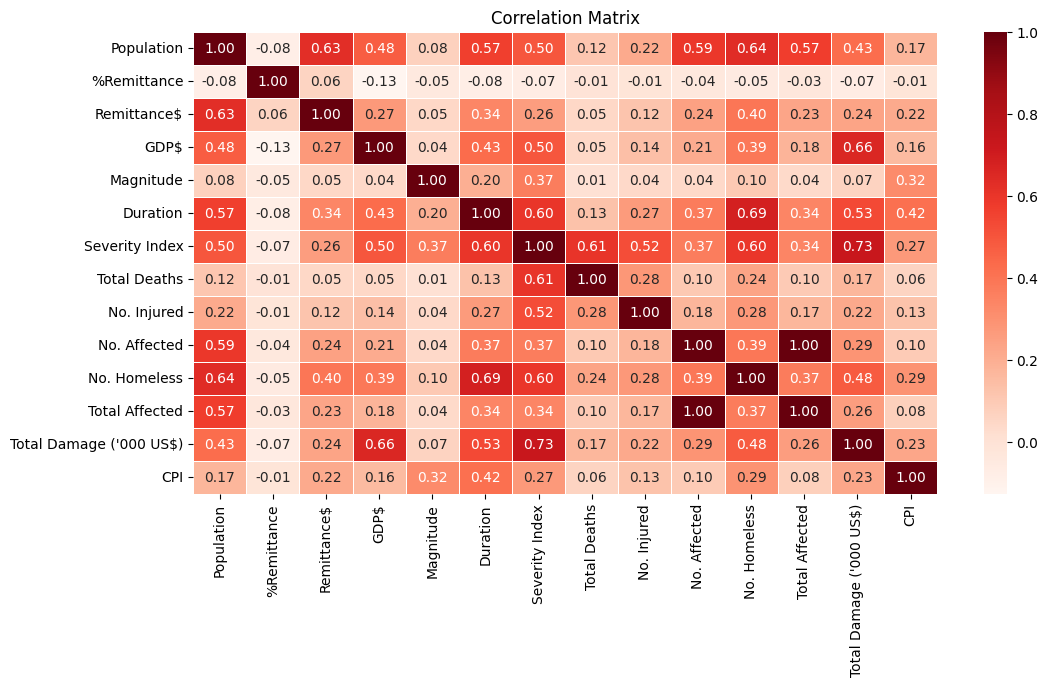

In [55]:
# Compute the correlation matrix
numeric_columns = aggregated_data.select_dtypes(include='number').columns
df_numeric = aggregated_data[numeric_columns]

corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

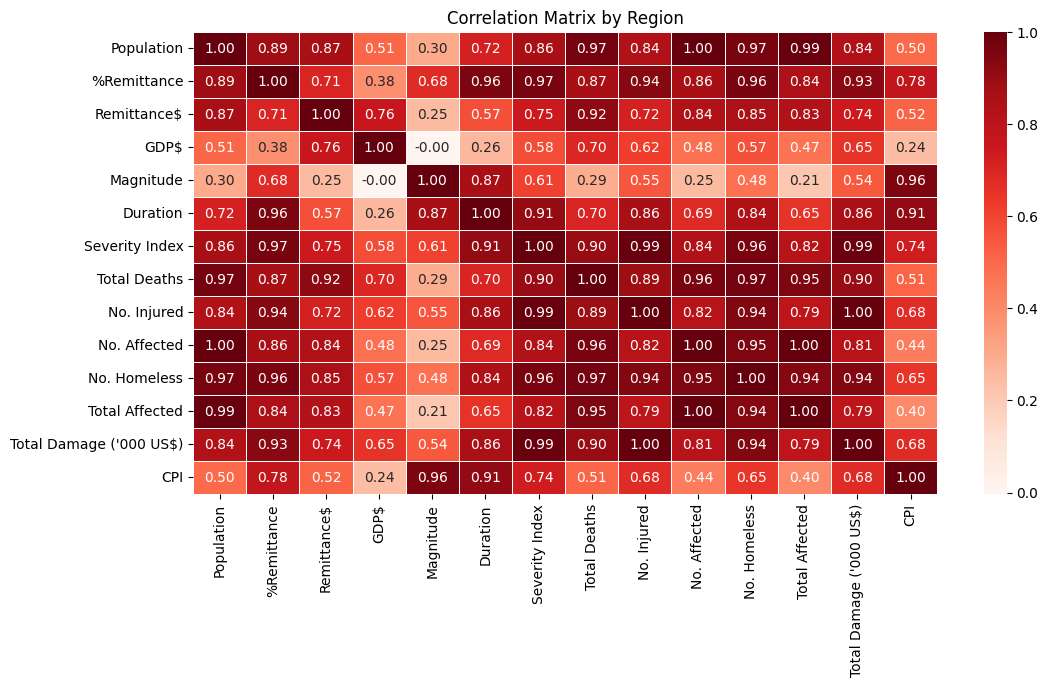

In [56]:
# Compute the correlation matrix
numeric_columns = aggregated_data.select_dtypes(include='number').columns

# Group by country name
grouped_data = aggregated_data.groupby('Region').sum()
df_numeric = grouped_data[numeric_columns]

corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix by Region')
plt.show()

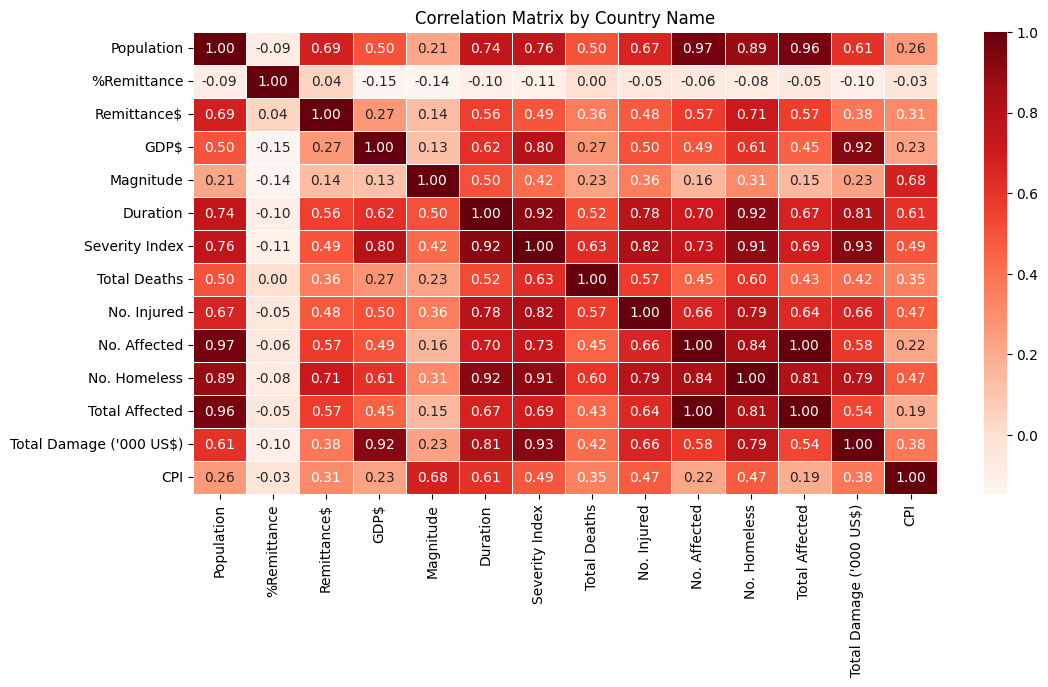

In [57]:
# Compute the correlation matrix
numeric_columns = aggregated_data.select_dtypes(include='number').columns

# Group by country name
grouped_data = aggregated_data.groupby('Country Name').sum()
df_numeric = grouped_data[numeric_columns]

corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix by Country Name')
plt.show()

In [67]:
import matplotlib.ticker as ticker

# Custom formatter function to convert xs to millions / billions with USD
def format_millions_billions(x, pos):
    if pd.notnull(x):  
        if x >= 1e9:
            return f"${x * 1e-9:.1f}B"  # Format in billions
        elif x >= 1e6:
            return f"${x * 1e-6:.1f}M"  # Format in millions
        elif x < 1e6:
            return f"${x / 1e6:.1f}M"  # Format in millions
    return x

In [68]:
# Custom formatter function to convert xs to percentage
def format_percentage(x, pos):
    if pd.notnull(x):  
        if x >= 0.1:
            return f"{x :.0f}%"  # Format in percentage
        else:
            return f"{x :.2f}%"  # Format in percentage
    return x

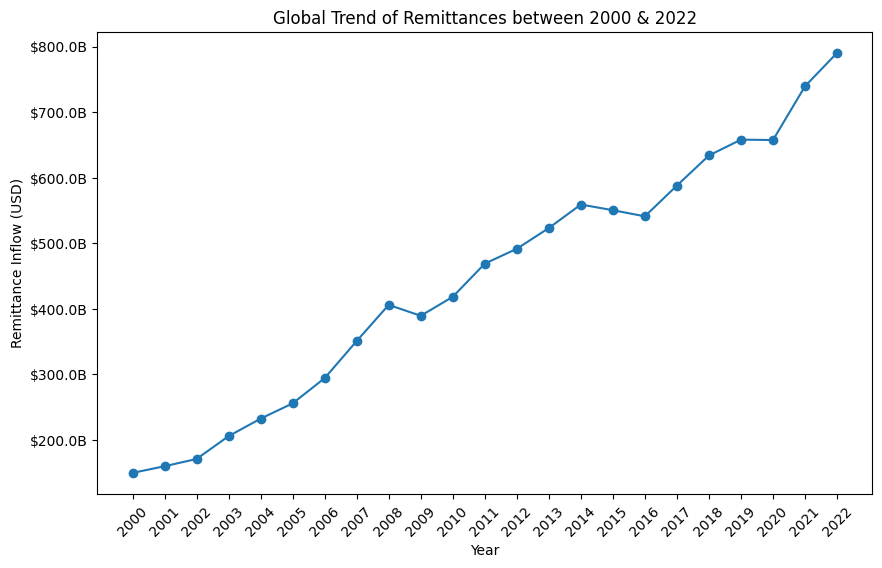

In [69]:
from matplotlib.ticker import FuncFormatter

# Group by year and calculate the sum of remittance
remittance_by_year = aggregated_data.groupby('Year')['Remittance$'].sum().reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(remittance_by_year['Year'], remittance_by_year['Remittance$'], marker='o', linestyle='-')

# Set x-axis ticks and labels
plt.xlabel('Year')
plt.ylabel('Remittance Inflow (USD)')

# Set title
plt.title('Global Trend of Remittances between 2000 & 2022')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Apply the formatter to the y-axis (assuming format_percentage is defined)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
plt.show()

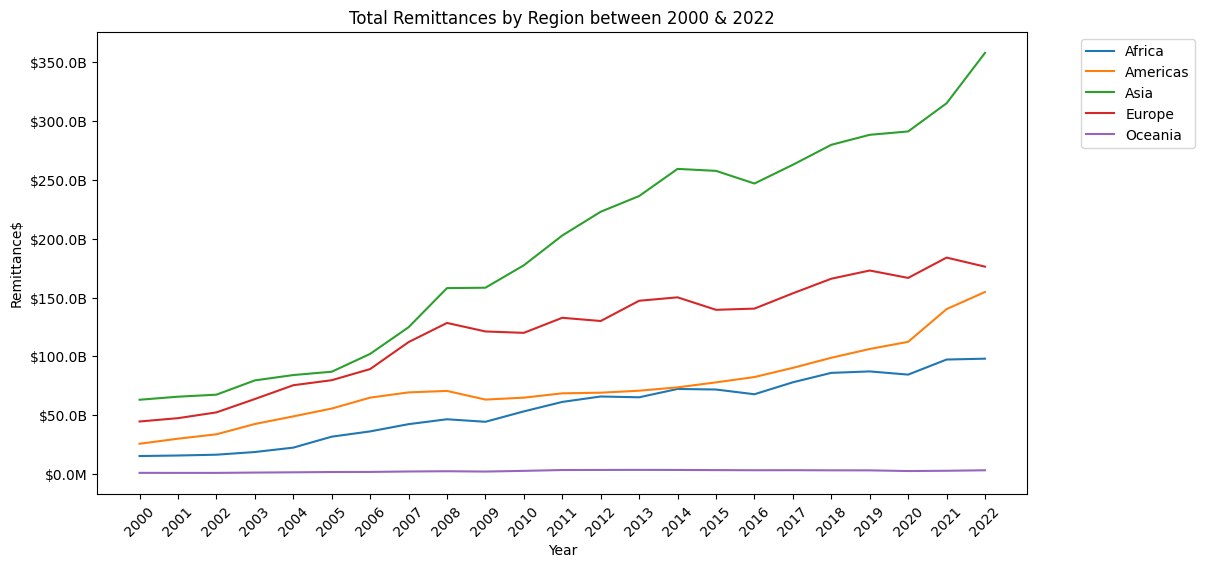

In [174]:
# Aggregate the data by summing 'Remittance$' grouped by 'Year' and 'Region'
aggregated_data_by_region = aggregated_data.groupby(['Year', 'Region'])['Remittance$'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data_by_region, x='Year', y='Remittance$', hue='Region')
plt.title('Total Remittances by Region between 2000 & 2022')
plt.xlabel('Year')
plt.ylabel('Remittance$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
plt.show()

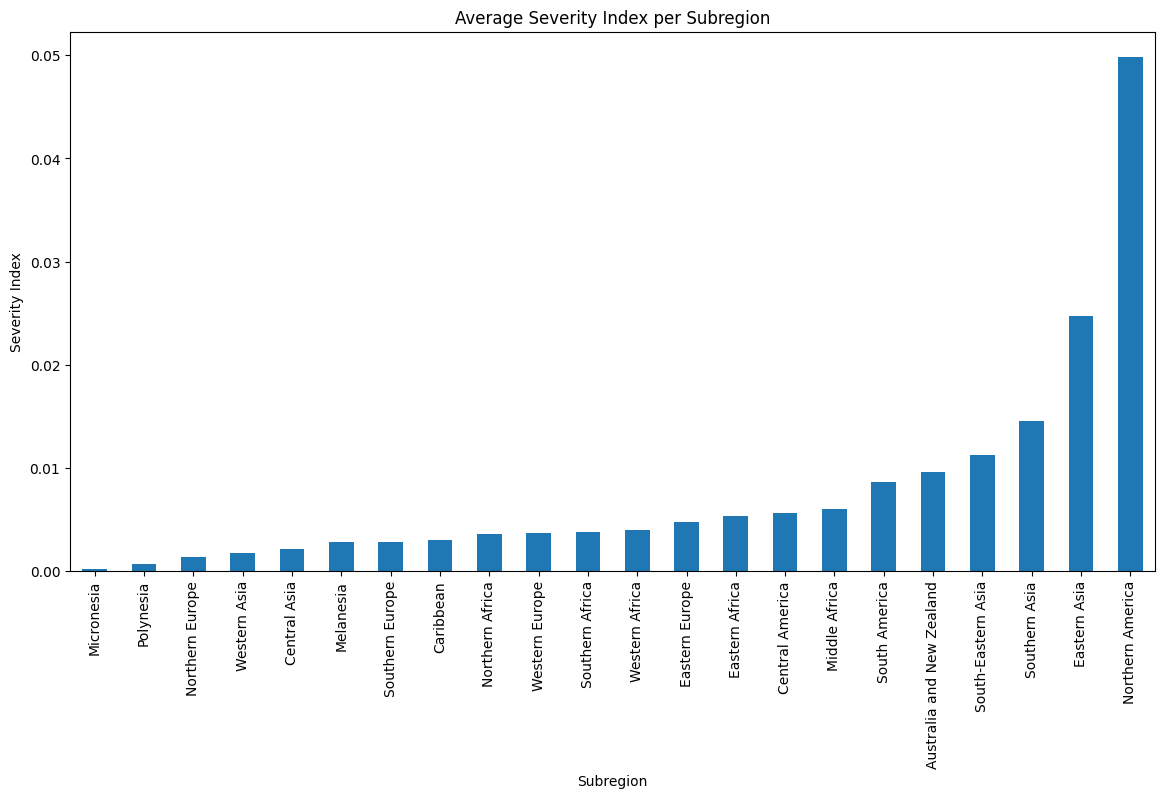

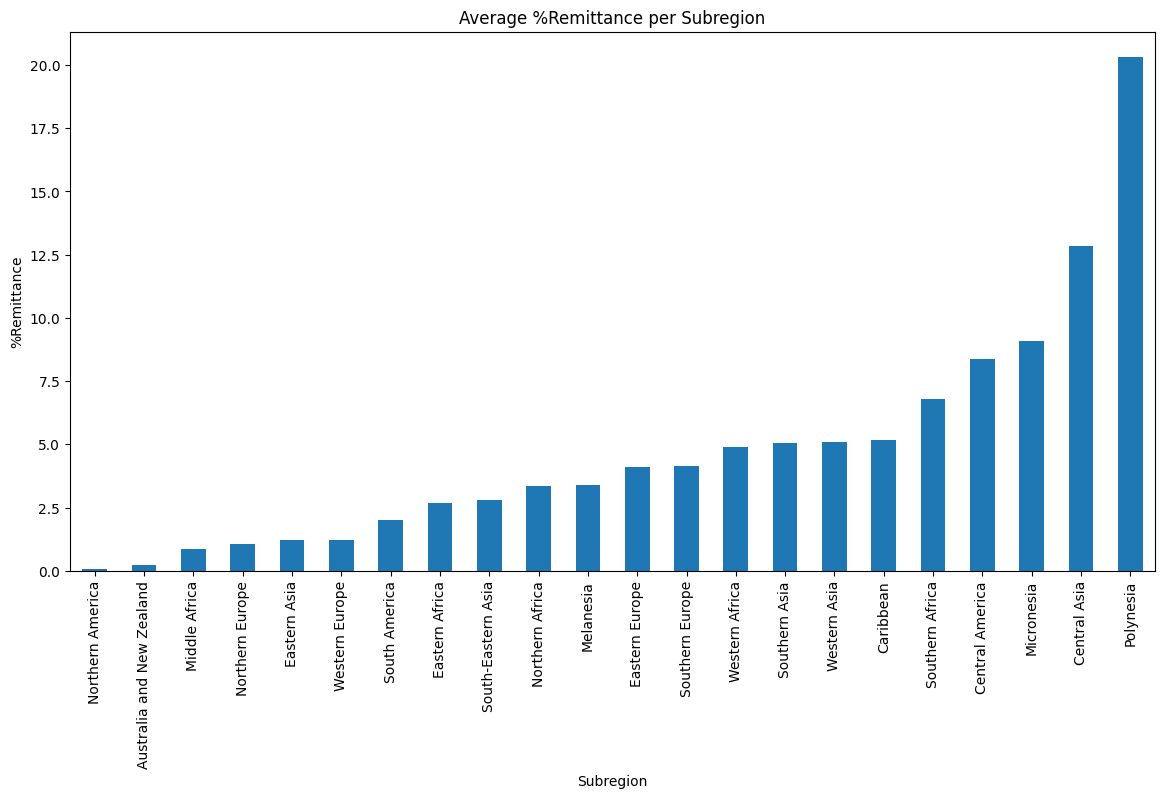

In [175]:
# Average Severity Index per country
severity_avg = aggregated_data.groupby('Subregion')['Severity Index'].mean().sort_values()

plt.figure(figsize=(14, 7))
severity_avg.plot(kind='bar')
plt.title('Average Severity Index per Subregion')
plt.ylabel('Severity Index')
plt.show()

# Average %Remittance per country
remittance_avg = aggregated_data.groupby('Subregion')['%Remittance'].mean().sort_values()

plt.figure(figsize=(14, 7))
remittance_avg.plot(kind='bar')
plt.title('Average %Remittance per Subregion')
plt.ylabel('%Remittance')
plt.show()


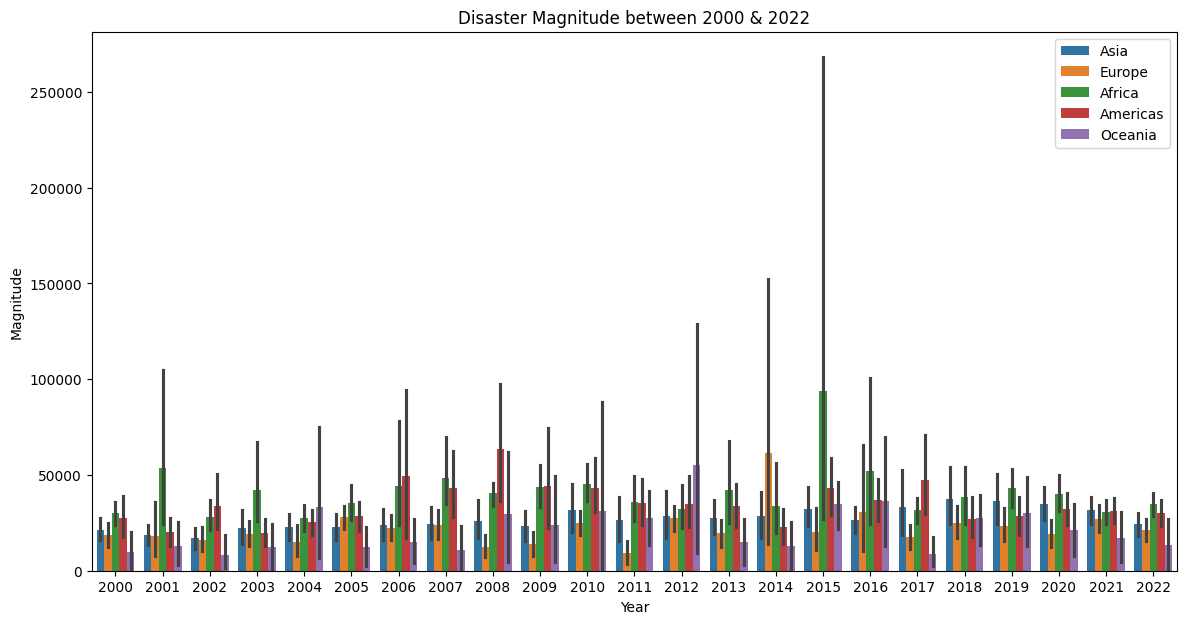

In [176]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Magnitude', hue='Region', data=aggregated_data)
plt.title('Disaster Magnitude between 2000 & 2022')
plt.ylabel('Magnitude')
plt.xlabel('Year')
plt.legend(loc='upper right')
plt.show()

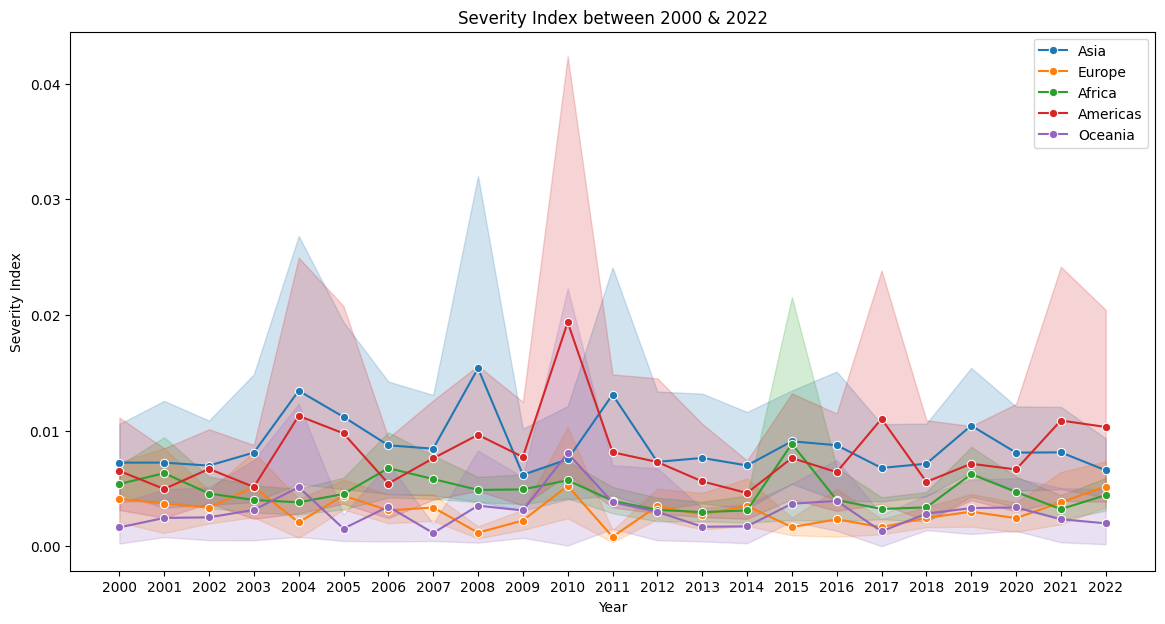

In [177]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Severity Index', hue='Region', data=aggregated_data, marker='o')
plt.title('Severity Index between 2000 & 2022')
plt.ylabel('Severity Index')
plt.xlabel('Year')
plt.legend(loc='upper right')
plt.show()

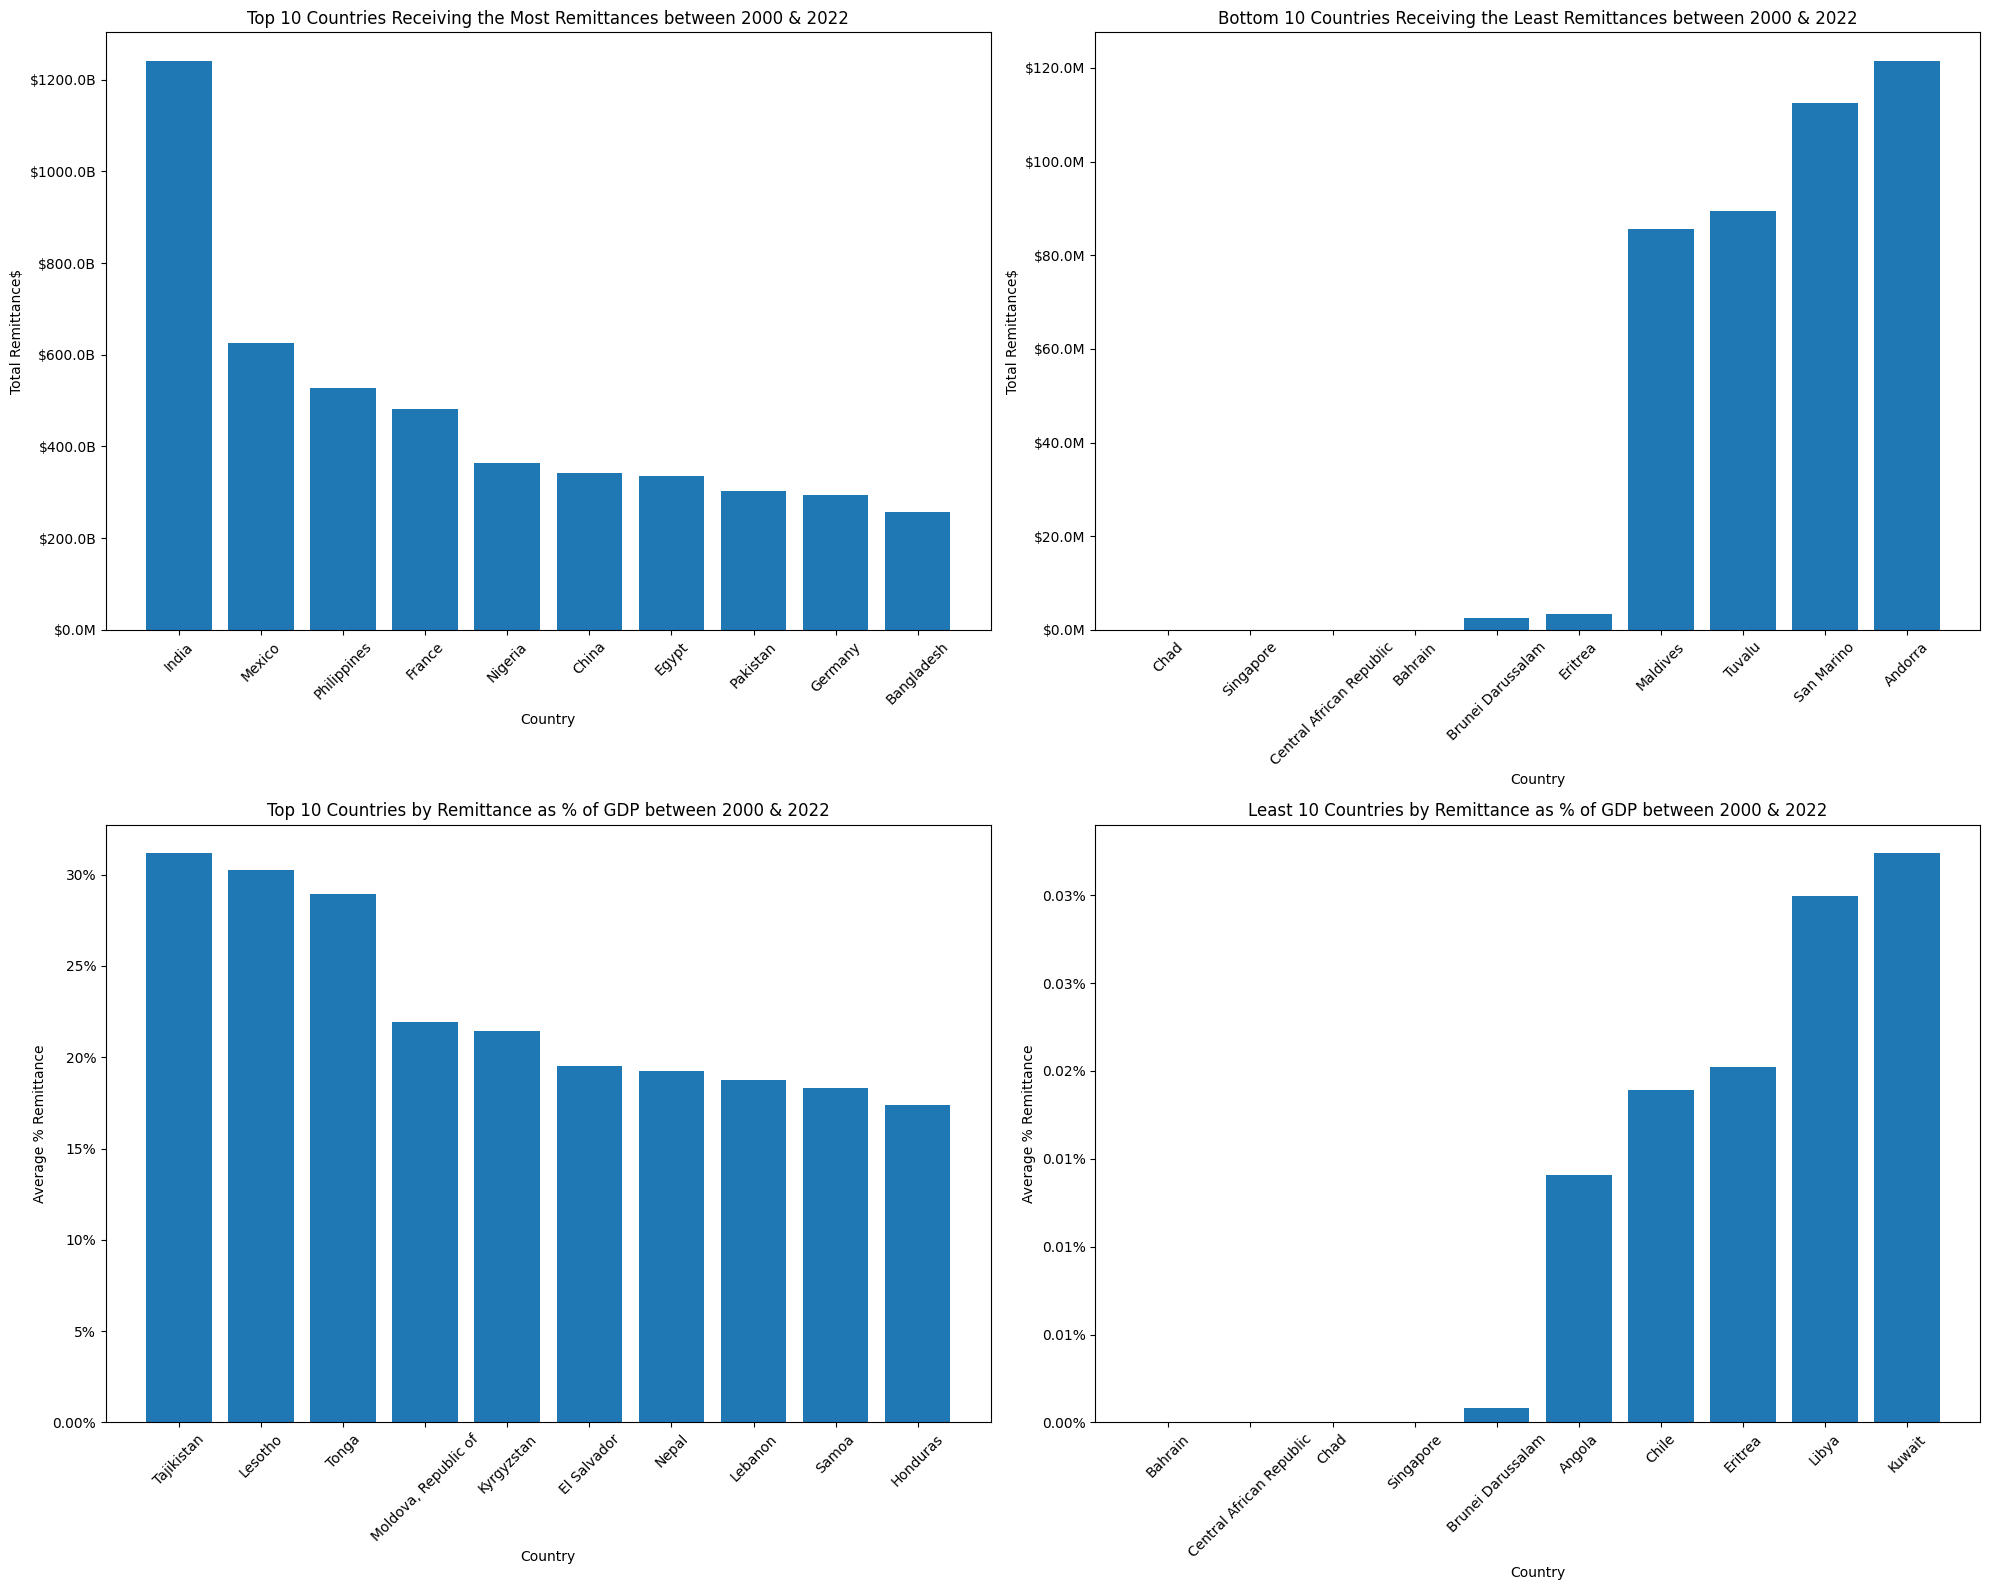

In [178]:
# Aggregate data by country for total remittances
country_remittances = aggregated_data.groupby('Country Name')['Remittance$'].sum().reset_index()

# Sort and get the top 10 countries
top_10_countries = country_remittances.sort_values(by='Remittance$', ascending=False).head(10)

# Sort and get the bottom 10 countries
bottom_10_countries = country_remittances.sort_values(by='Remittance$', ascending=True).head(10)

# Aggregate data by country for remittances as % of GDP
country_remittance_pct = aggregated_data.groupby('Country Name')['%Remittance'].mean().reset_index()

# Sort and get the top 10 countries by % remittance
top_10_countries_pct = country_remittance_pct.sort_values(by='%Remittance', ascending=False).head(10)

# Sort and get the least 10 countries by % remittance
least_10_countries_pct = country_remittance_pct.sort_values(by='%Remittance', ascending=True).head(10)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Plot top 10 countries with highest remittances
axs[0, 0].bar(top_10_countries['Country Name'], top_10_countries['Remittance$'])
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Total Remittance$')
axs[0, 0].set_title('Top 10 Countries Receiving the Most Remittances between 2000 & 2022')
axs[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot bottom 10 countries with lowest remittances
axs[0, 1].bar(bottom_10_countries['Country Name'], bottom_10_countries['Remittance$'])
axs[0, 1].set_xlabel('Country')
axs[0, 1].set_ylabel('Total Remittance$')
axs[0, 1].set_title('Bottom 10 Countries Receiving the Least Remittances between 2000 & 2022')
axs[0, 1].yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot top 10 countries with highest % remittance
axs[1, 0].bar(top_10_countries_pct['Country Name'], top_10_countries_pct['%Remittance'])
axs[1, 0].set_xlabel('Country')
axs[1, 0].set_ylabel('Average % Remittance')
axs[1, 0].set_title('Top 10 Countries by Remittance as % of GDP between 2000 & 2022')
axs[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(format_percentage))
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot least 10 countries with lowest % remittance
axs[1, 1].bar(least_10_countries_pct['Country Name'], least_10_countries_pct['%Remittance'])
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Average % Remittance')
axs[1, 1].set_title('Least 10 Countries by Remittance as % of GDP between 2000 & 2022')
axs[1, 1].yaxis.set_major_formatter(ticker.FuncFormatter(format_percentage))
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

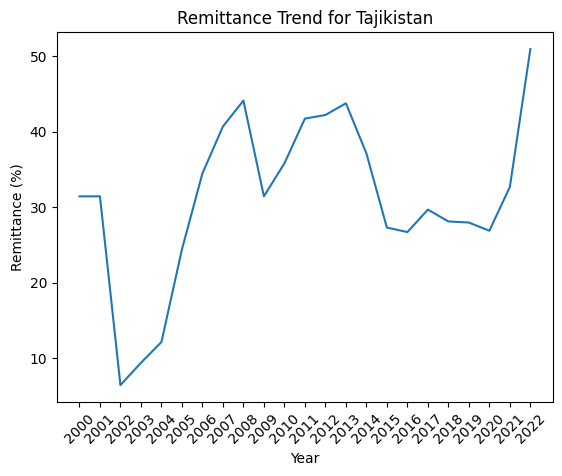

In [179]:
import matplotlib.pyplot as plt

# Plot remittance trend over time for a specific country
country_data = aggregated_data[aggregated_data['Country Name'] == 'Tajikistan']
plt.plot(country_data['Year'], country_data['%Remittance'])
plt.xlabel('Year')
plt.ylabel('Remittance (%)')
plt.title('Remittance Trend for Tajikistan')
plt.xticks(rotation=45)  # Setting rotation of x-axis labels to 45 degrees
plt.show()

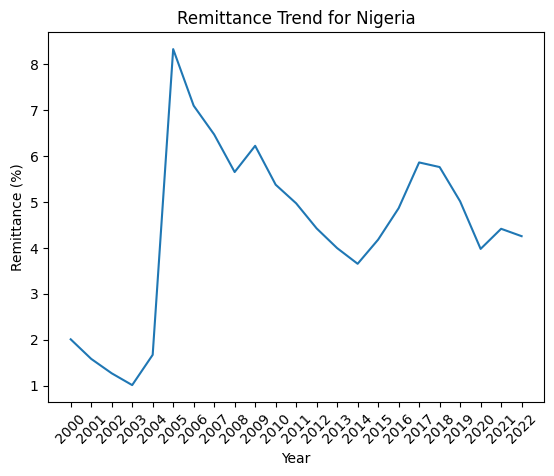

In [180]:
import matplotlib.pyplot as plt

# Plot remittance trend over time for a specific country
country_data = aggregated_data[aggregated_data['Country Name'] == 'Nigeria']
plt.plot(country_data['Year'], country_data['%Remittance'])
plt.xlabel('Year')
plt.ylabel('Remittance (%)')
plt.title('Remittance Trend for Nigeria')
plt.xticks(rotation=45)  # Setting rotation of x-axis labels to 45 degrees
plt.show()

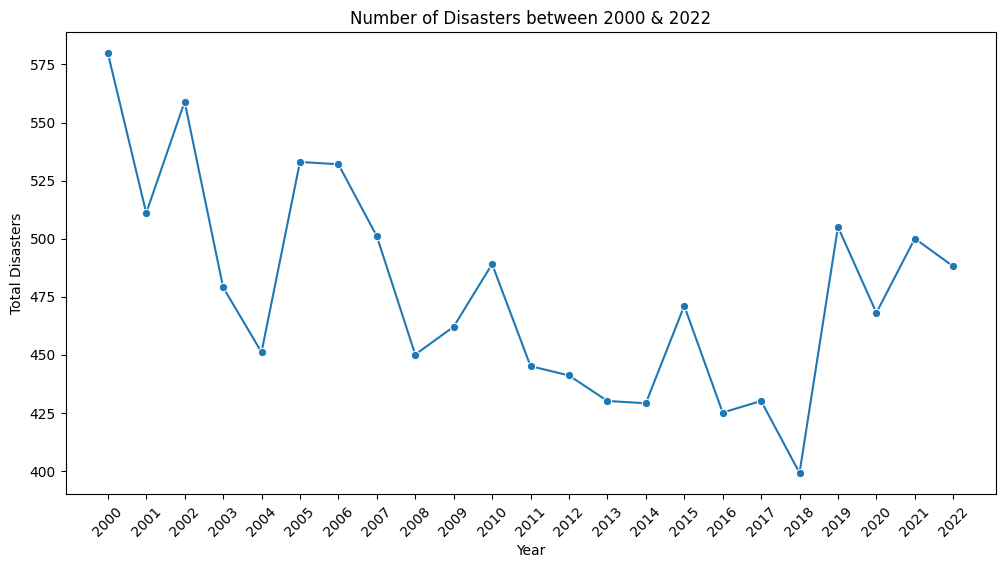

In [181]:
disasters_per_year = merged_data.groupby('Year')['Disaster Type'].count().reset_index()

# Time series plot for remittance inflow
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Disaster Type', data=disasters_per_year, marker='o')
plt.title('Number of Disasters between 2000 & 2022')
plt.xlabel('Year')
plt.ylabel('Total Disasters')
plt.xticks(rotation=45)

plt.show()

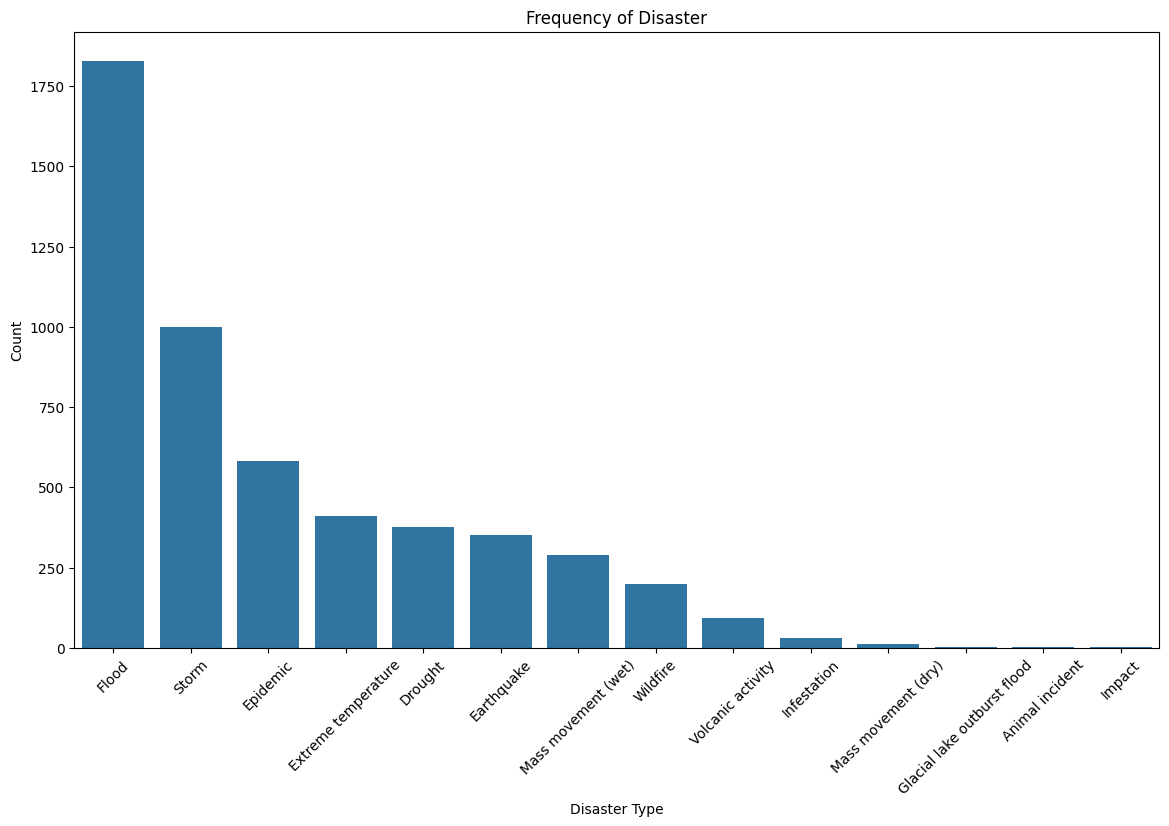

In [182]:
# Filter out rows where 'Disaster Type' is "No Disaster"
filtered_data = aggregated_data[aggregated_data['Disaster Type'] != "No Disaster"]

# Split disaster types and explode into separate rows
disaster_types = filtered_data['Disaster Type'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
disaster_types.name = 'Disaster Type'

# Frequency of each disaster type
disaster_type_counts = disaster_types.value_counts().reset_index()
disaster_type_counts.columns = ['Disaster Type', 'Count']

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=disaster_type_counts, x='Disaster Type', y='Count')
plt.title('Frequency of Disaster')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

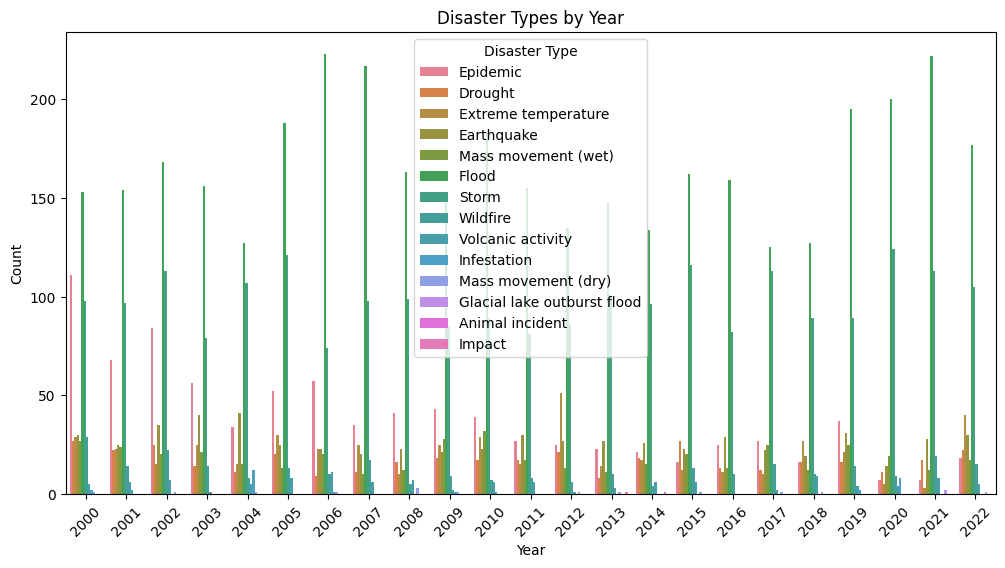

In [183]:
# Filter out rows with 'No Disaster' in the 'Disaster Type' column
filtered_data = merged_data[merged_data['Disaster Type'] != 'No Disaster']

# Count plot for disaster types by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Disaster Type', data=filtered_data)
plt.title('Disaster Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Disaster Type')
plt.xticks(rotation=45)
plt.show()

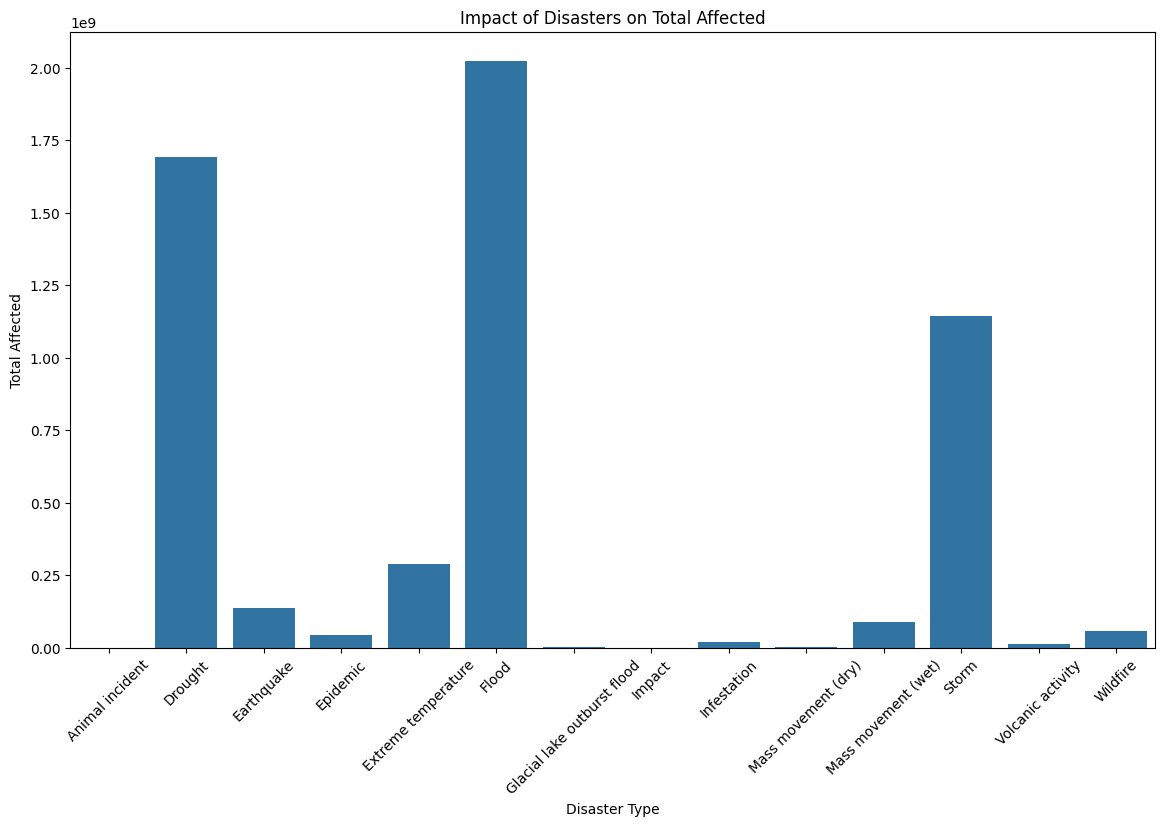

In [184]:
# Split disaster types and explode into separate rows
disaster_types = filtered_data['Disaster Type'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
disaster_types.name = 'Disaster Type'

# Merge back with the original data to get 'Total Affected'
merged_data = filtered_data.drop(columns=['Disaster Type']).join(disaster_types)

# Sum of total affected by disaster type
total_affected_by_disaster = merged_data.groupby('Disaster Type')['Total Affected'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=total_affected_by_disaster, x='Disaster Type', y='Total Affected')
plt.title('Impact of Disasters on Total Affected')
plt.xlabel('Disaster Type')
plt.ylabel('Total Affected')
plt.xticks(rotation=45)
plt.show()

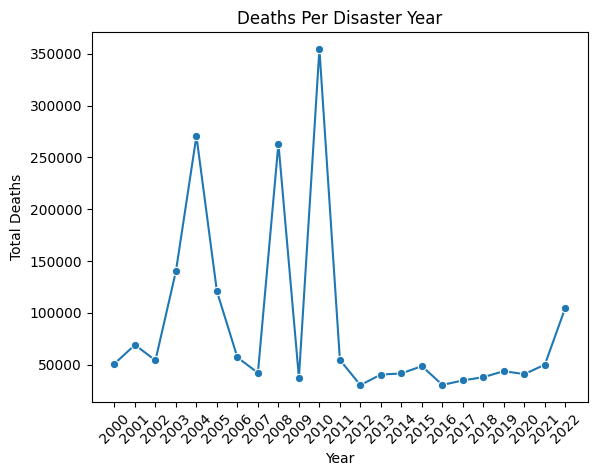

In [185]:
# Aggregate the data by summing 'Total Deaths' column grouped by 'Year'
aggregated_deaths = aggregated_data.groupby('Year')['Total Deaths'].sum().reset_index()

# Plot the Line Plot
sns.lineplot(x='Year', y='Total Deaths', data=aggregated_deaths, marker='o')
plt.title("Deaths Per Disaster Year")
plt.xticks(rotation=45)
plt.show()

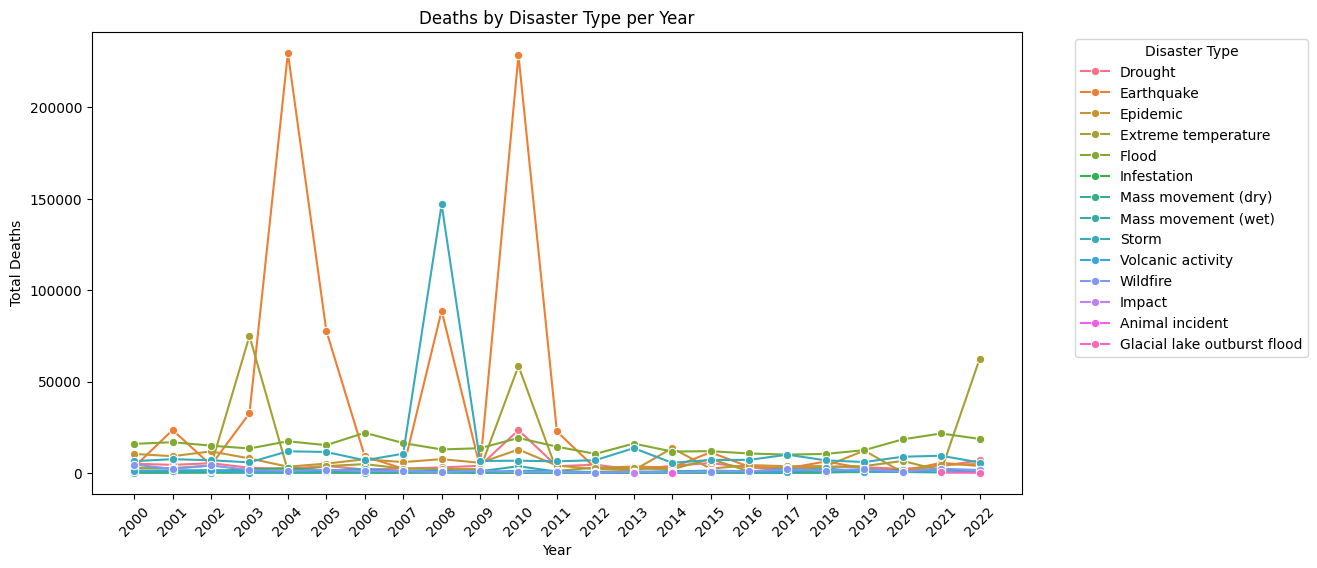

In [186]:
# Aggregate the data by summing 'Total Deaths' grouped by 'Year' and 'Disaster Type'
aggregated_deaths_by_type = merged_data.groupby(['Year', 'Disaster Type'])['Total Deaths'].sum().reset_index()

# Plot the Line Plot showing total deaths by disaster type per year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total Deaths', hue='Disaster Type', data=aggregated_deaths_by_type, marker='o')
plt.title("Deaths by Disaster Type per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

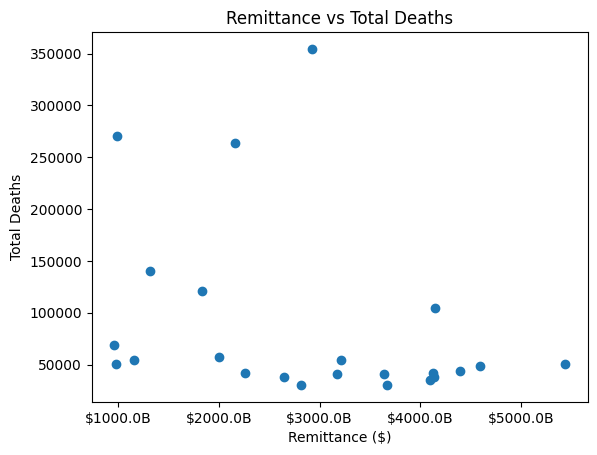

In [187]:
# Aggregate the data by summing 'Total Deaths' and 'Remittance$' grouped by 'Year'
aggregated_data_remittance = merged_data.groupby('Year').agg({'Total Deaths': 'sum', 'Remittance$': 'sum'}).reset_index()

# Plot relationship between remittance$ and total deaths
plt.scatter(aggregated_data_remittance['Remittance$'], aggregated_data_remittance['Total Deaths'])
plt.xlabel('Remittance ($)')
plt.ylabel('Total Deaths')
plt.title('Remittance vs Total Deaths')
# Apply the formatter to the y-axis (assuming format_percentage is defined)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
plt.show()

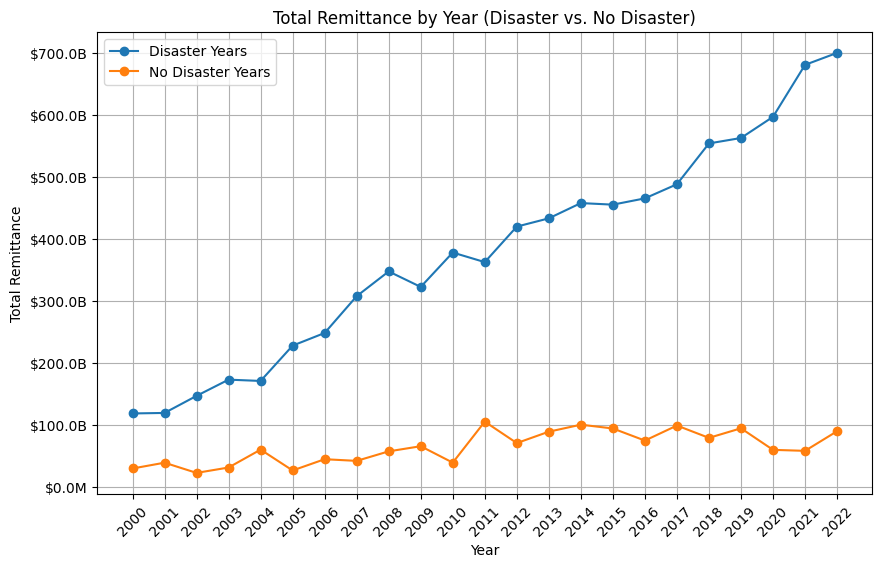

In [73]:
# Group data by country name, year, and disaster type
disaster_grouped = merged_data[merged_data['Disaster Type'] != 'No Disaster'].groupby(['Country Name', 'Year'])['Remittance$'].mean().reset_index()
no_disaster_grouped = merged_data[merged_data['Disaster Type'] == 'No Disaster'].groupby(['Country Name', 'Year'])['Remittance$'].mean().reset_index()

# Sum up remittance values for all columns by year for disaster and no disaster groups
disaster_grouped_sum = disaster_grouped.groupby('Year')['Remittance$'].sum()
no_disaster_grouped_sum = no_disaster_grouped.groupby('Year')['Remittance$'].sum()

# Create the line graph
plt.figure(figsize=(10, 6)) 
plt.plot(disaster_grouped_sum.index, disaster_grouped_sum.values, marker='o', label='Disaster Years')
plt.plot(no_disaster_grouped_sum.index, no_disaster_grouped_sum.values, marker='o', label='No Disaster Years')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Total Remittance')
plt.title('Total Remittance by Year (Disaster vs. No Disaster)')
plt.grid(True)

# Apply the formatter to the y-axis for percentage
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
plt.xticks(rotation=45)

plt.show()

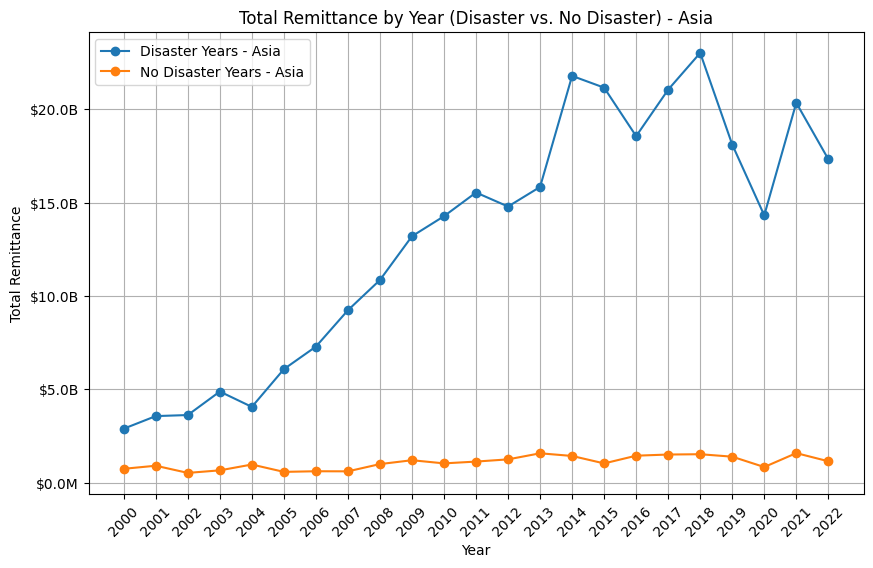

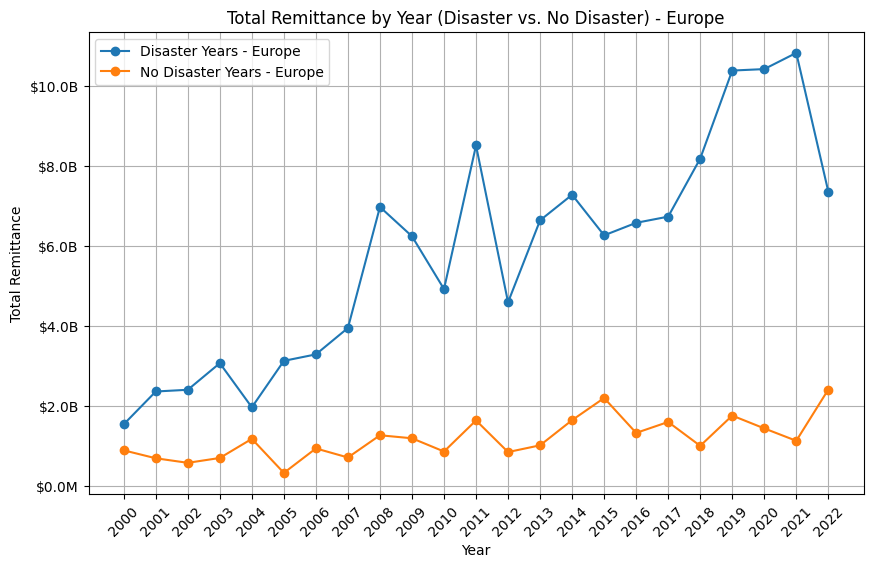

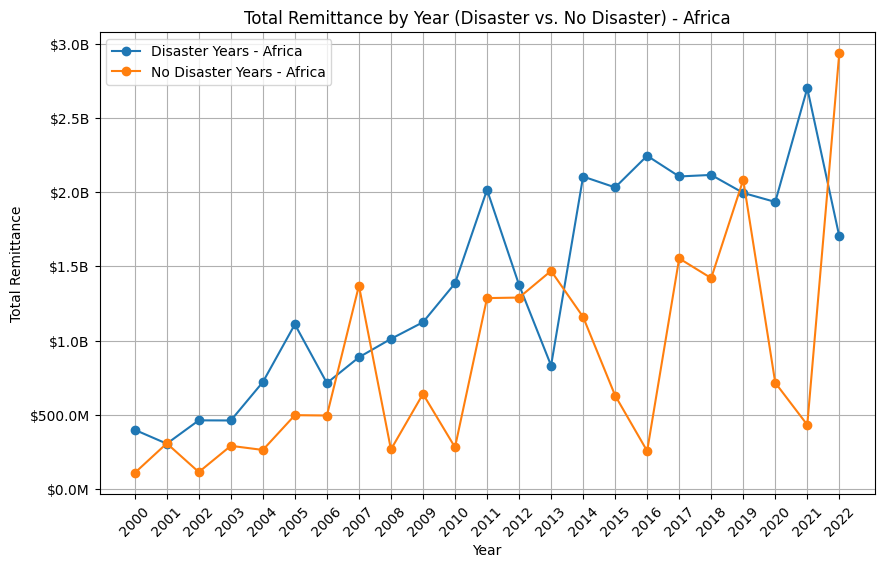

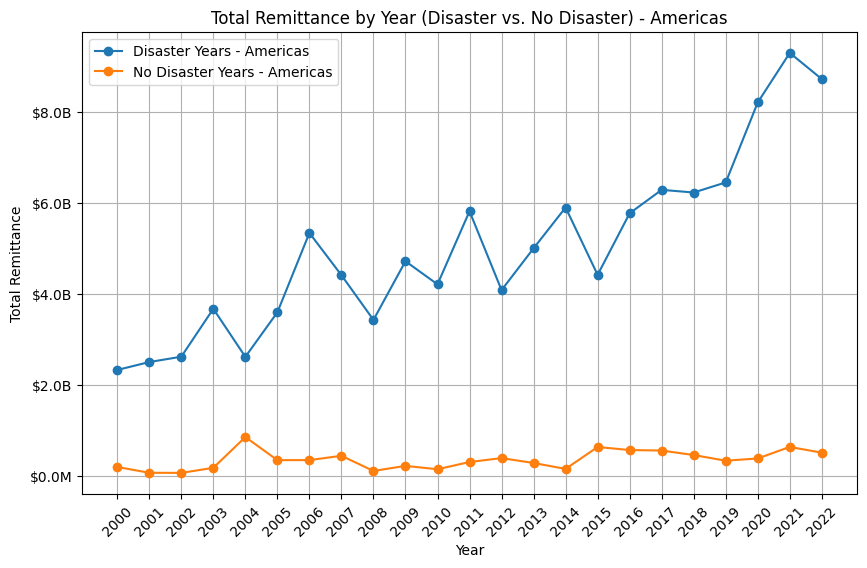

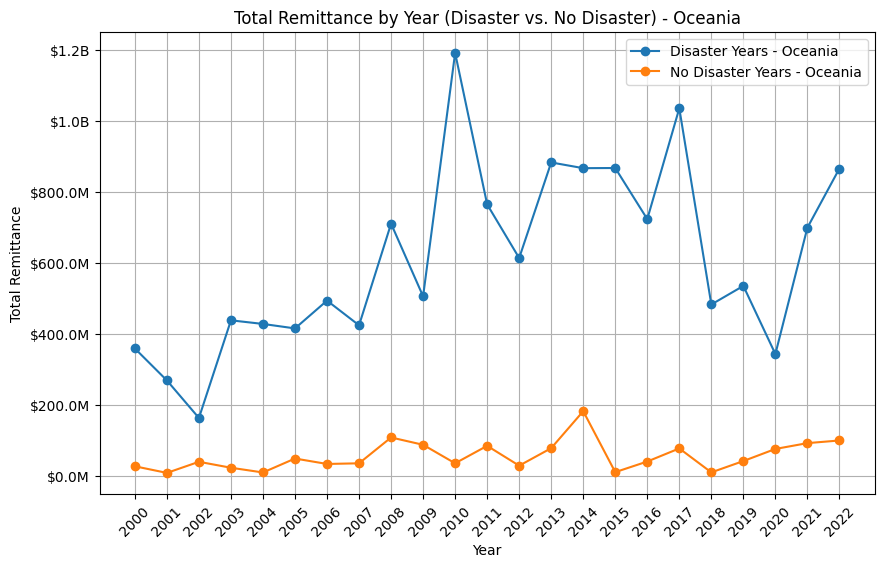

In [74]:
# Group data by region and year
disaster_grouped_region = merged_data[merged_data['Disaster Type'] != 'No Disaster'].groupby(['Region', 'Year'])['Remittance$'].mean().reset_index()
no_disaster_grouped_region = merged_data[merged_data['Disaster Type'] == 'No Disaster'].groupby(['Region', 'Year'])['Remittance$'].mean().reset_index()

# Sum up remittance values for all columns by year for disaster and no disaster groups by region
disaster_grouped_sum_region = disaster_grouped_region.groupby(['Region', 'Year'])['Remittance$'].sum()
no_disaster_grouped_sum_region = no_disaster_grouped_region.groupby(['Region', 'Year'])['Remittance$'].sum()

# Get unique regions
regions = merged_data['Region'].unique()

# Create separate line graphs for each region
for region in regions:
    plt.figure(figsize=(10, 6)) 
    plt.plot(disaster_grouped_sum_region.loc[region].index, disaster_grouped_sum_region.loc[region].values, marker='o', label='Disaster Years - ' + region)
    plt.plot(no_disaster_grouped_sum_region.loc[region].index, no_disaster_grouped_sum_region.loc[region].values, marker='o', label='No Disaster Years - ' + region)
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Total Remittance')
    plt.title('Total Remittance by Year (Disaster vs. No Disaster) - ' + region)
    plt.grid(True)

    # Apply the formatter to the y-axis for millions/billions (based on your 'format_millions_billions' function)
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
    plt.xticks(rotation=45)

    plt.show()

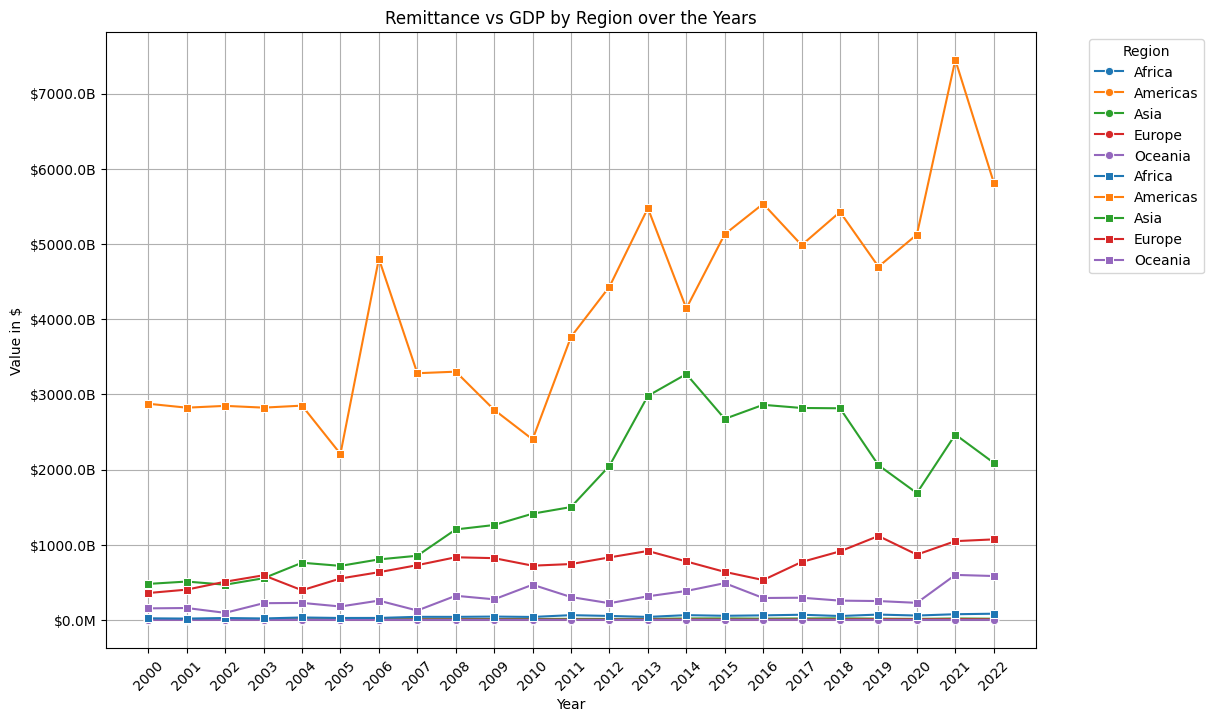

In [75]:
# Group data by region and year, and calculate mean remittance and GDP values
aggregated_data = merged_data.groupby(['Region', 'Year']).agg({'Remittance$': 'mean', 'GDP$': 'mean'}).reset_index()

# Create the line plot to visualize remittance vs GDP by region over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=aggregated_data, x='Year', y='Remittance$', hue='Region', marker='o')
sns.lineplot(data=aggregated_data, x='Year', y='GDP$', hue='Region', marker='s')
plt.title('Remittance vs GDP by Region over the Years')
plt.xlabel('Year')
plt.ylabel('Value in $')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#Apply the formatter to the y-axis for millions/billions (based on your 'format_millions_billions' function)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
plt.xticks(rotation=45)
plt.show()

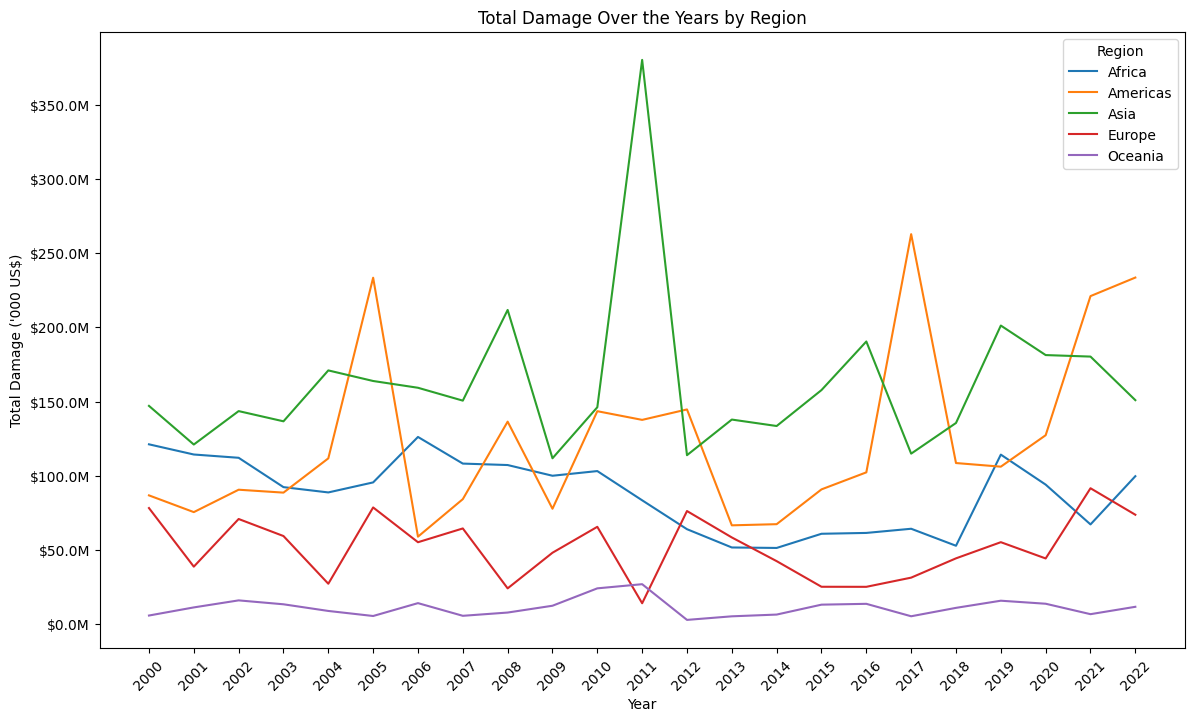

In [78]:
# Sum of total damage by year and region
damage_by_year_region = aggregated_data.groupby(['Year', 'Region'])['Total Damage (\'000 US$)'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=damage_by_year_region, x='Year', y='Total Damage (\'000 US$)', hue='Region')
plt.title('Total Damage Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Damage (\'000 US$)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_millions_billions))
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

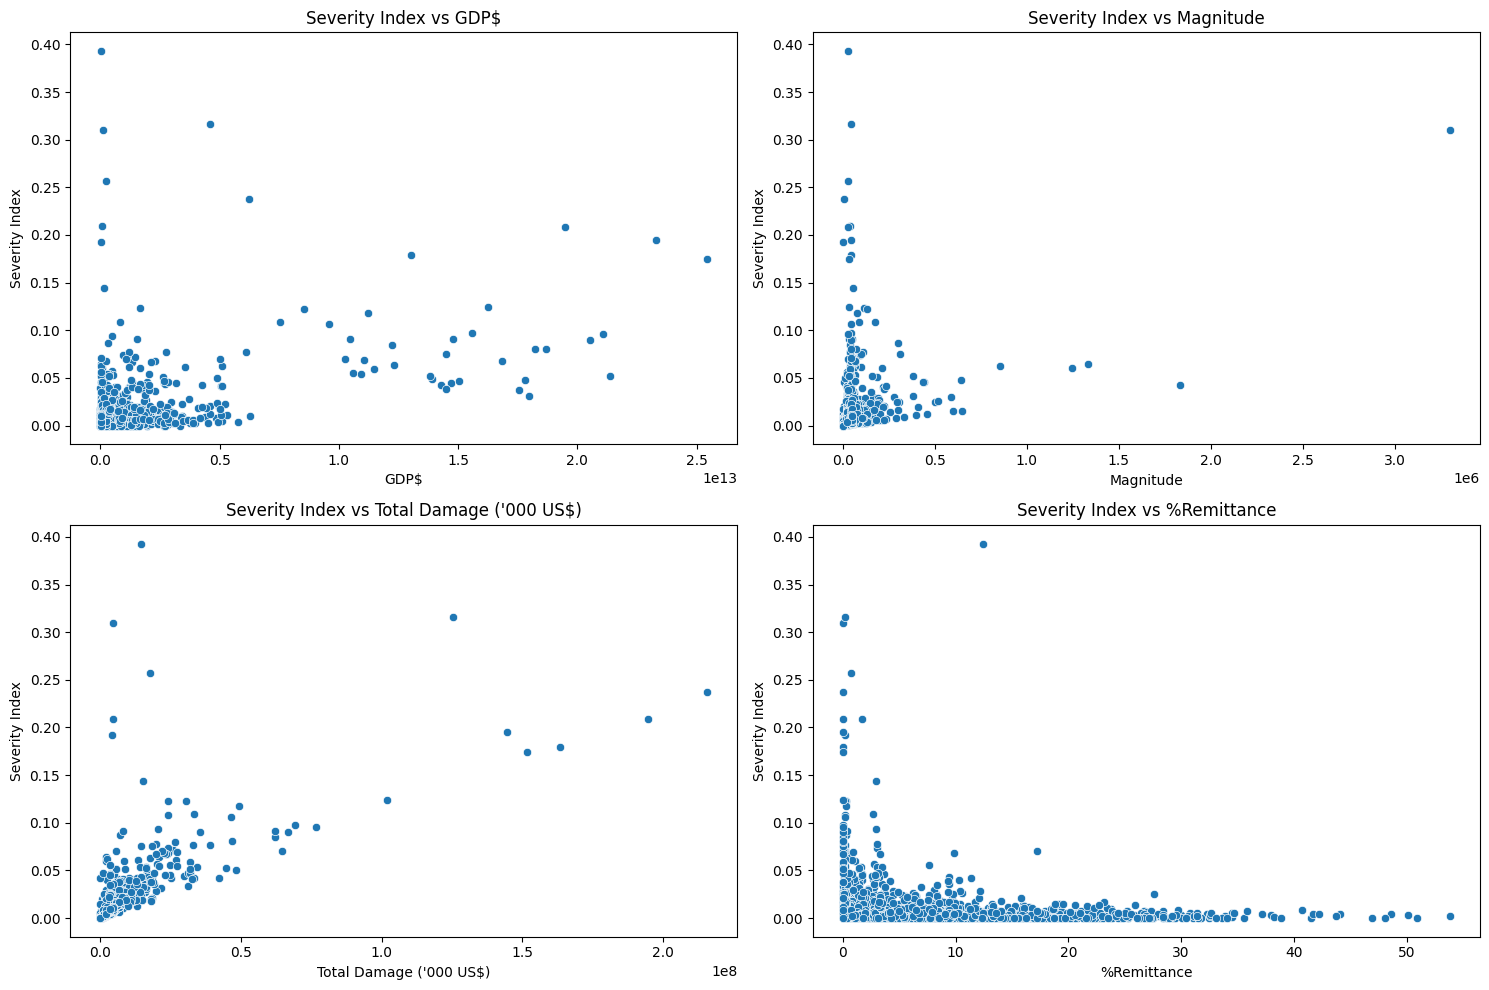

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot against Severity Index
key_features = ['GDP$', 'Magnitude', 'Total Damage (\'000 US$)', '%Remittance']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=aggregated_data, x=feature, y='Severity Index')
    plt.title(f'Severity Index vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Severity Index')

plt.tight_layout()
plt.show()


## Predictive Model (Random Forest Regression)

In [57]:
b# Define numerical columns
numerical_cols = ['Population', 'GDP$', 'Magnitude', 'Total Deaths', 'No. Injured', 
                  'No. Affected', 'No. Homeless', 'Total Affected', 'Duration',
                  'Severity Index', 'Total Damage (\'000 US$)', 'CPI']

# Calculate z-scores and filter out outliers
aggregated_data[numerical_cols] = aggregated_data[numerical_cols].apply(zscore)
aggregated_data = aggregated_data[(aggregated_data[numerical_cols] < 3).all(axis=1) & 
                                  (aggregated_data[numerical_cols] > -3).all(axis=1)]

# One-hot encode 'Disaster Type'
disaster_dummies = aggregated_data['Disaster Type'].str.get_dummies(sep=', ')
aggregated_data = pd.concat([aggregated_data, disaster_dummies], axis=1)

# Drop the original 'Disaster Type' column
aggregated_data = aggregated_data.drop(columns=['Disaster Type'])

# Define features and target
numerical_features = ['Population', 'GDP$', 'Magnitude', 'Total Deaths', 'No. Injured', 
                      'No. Affected', 'No. Homeless', 'Total Affected', 'Total Damage (\'000 US$)', 'CPI']
categorical_features = ['Region', 'Subregion'] + list(disaster_dummies.columns)

X = aggregated_data[numerical_features + categorical_features]
y = aggregated_data['%Remittance']

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the preprocessing pipeline to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R^2 Score: {r2}")

# Save the preprocessor and models
joblib.dump(preprocessor, 'preprocessor.pkl')
for model_name, model in models.items():
    joblib.dump(model, f"{model_name}.pkl")

Random Forest Mean Squared Error: 5.454006452746261
Random Forest R^2 Score: 0.8644056372971874
Decision Tree Mean Squared Error: 7.71214078485064
Decision Tree R^2 Score: 0.8082652039640259
Linear Regression Mean Squared Error: 32.79254000697532
Linear Regression R^2 Score: 0.18473078420848577


In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Best Random Forest Parameters:", best_params)
print("Best Random Forest Mean Squared Error:", mse_best_rf)
print("Best Random Forest R^2 Score:", r2_best_rf)

# Save the best model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')


Best Random Forest Parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Mean Squared Error: 5.50239023597341
Best Random Forest R^2 Score: 0.863202747585069


['best_random_forest_model.pkl']